In [1]:
from rc_extension import Reward_Competition
from pathlib import Path

In [2]:
# method = input("Calculation method (modified, baseline, standard): ")
# directory_path = Path(input("Path for plots: "))

cohort = "combined"
# cohort = "cohort_1_2"
# cohort = "cohort_3"
csv_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\P2C1_Reward_Comp_Manual_Scoring.xlsx"
csv_path1 = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_3\P2C3_Reward_Comp_Manual_Scoring.xlsx"
# experiment_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\testing"
# experiment_path1 = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_3\testing"
experiment_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\Rig Data"
experiment_path1 = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_3\Rig Data"

# directory_path = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Training\\plots\\{method}\\{day}\\{region}')
directory_path = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\{cohort}\\first_last')
directory_path1 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\{cohort}\\scatter')
directory_path2 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\{cohort}\\win_lose\\EI')
directory_path3 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\{cohort}\\win_lose')


# Create the directory (with parents=True to create nested directories)
directory_path.mkdir(parents=True, exist_ok=True)
directory_path1.mkdir(parents=True, exist_ok=True)
directory_path2.mkdir(parents=True, exist_ok=True)
directory_path3.mkdir(parents=True, exist_ok=True)

In [3]:
exp = Reward_Competition(experiment_path1, behavior_folder_path=None)
if cohort == "combined":
    exp1 = Reward_Competition(experiment_path, behavior_folder_path=None)

read from t=0s to t=2055.26s
read from t=0s to t=2061.76s
read from t=0s to t=2052.17s
read from t=0s to t=2387.77s
read from t=0s to t=2047.56s
read from t=0s to t=2049.47s
read from t=0s to t=2059.26s
read from t=0s to t=2065.26s
read from t=0s to t=2431.87s
read from t=0s to t=2072.35s
read from t=0s to t=2044.46s
read from t=0s to t=2045.26s
read from t=0s to t=2046.06s
read from t=0s to t=2065.37s
read from t=0s to t=2044.26s
read from t=0s to t=2057.57s
read from t=0s to t=2231.17s
read from t=0s to t=2052.17s
read from t=0s to t=2184.07s
read from t=0s to t=2078.66s
read from t=0s to t=2065.37s
read from t=0s to t=2047.26s
read from t=0s to t=2055.26s
read from t=0s to t=2055.26s
read from t=0s to t=2061.76s
read from t=0s to t=2061.76s
read from t=0s to t=2052.17s
read from t=0s to t=2052.17s
read from t=0s to t=2387.77s
read from t=0s to t=2387.77s
read from t=0s to t=2047.56s
read from t=0s to t=2047.56s
read from t=0s to t=2049.47s
read from t=0s to t=2049.47s
read from t=0s

In [4]:
exp.rc_processing()
if cohort == "combined":
    exp1.rc_processing()

dict_items([('nn1_nn3-250203-085508', <trial_class.Trial object at 0x000001FEA3137B60>), ('nn1_pp1-250205-090150', <trial_class.Trial object at 0x000001FEC6141B50>), ('nn2_nn1-250204-085225', <trial_class.Trial object at 0x000001FEC5BE5310>), ('nn2_nn4-250205-113735', <trial_class.Trial object at 0x000001FEC61C5FA0>), ('nn2_pp2-250206-053033', <trial_class.Trial object at 0x000001FEC6196210>), ('nn3_pp3-250204-122327', <trial_class.Trial object at 0x000001FEC59DE810>), ('nn4_nn3-250206-081929', <trial_class.Trial object at 0x000001FEC61C7050>), ('nn4_pp4-250203-121223', <trial_class.Trial object at 0x000001FEC6220440>), ('nn5_nn8-250205-104235', <trial_class.Trial object at 0x000001FEC62203E0>), ('nn5_pp5-250203-080636', <trial_class.Trial object at 0x000001FEA31A6300>), ('nn6_nn7-250203-112333', <trial_class.Trial object at 0x000001FEC60DFBC0>), ('nn6_nn7-250206-073116', <trial_class.Trial object at 0x000001FEC60DF710>), ('nn7_pp7-250205-131504', <trial_class.Trial object at 0x000001F

In [5]:
if cohort == "combined":
    exp1.read_manual_scoring1(csv_path)
    exp1.merge_data1()
exp.read_manual_scoring2(csv_path1)
exp.merge_data2()

Total rows: 48
Rows with missing trials: 1
Total rows: 48
Rows with missing trials: 4


In [6]:
exp.remove_tangles()
if cohort == "combined":
    exp1.remove_tangles()
    exp.combining_cohorts(exp1.df)
df_winning = exp.winning()
df_losing = exp.losing()

In [7]:
exp.find_first_lick_after_sound_cue(df_losing)
exp.find_first_lick_after_sound_cue(df_winning)
# compute offset to first lick after sound cue
exp.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset', df=df_winning)
exp.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset', df=df_losing)

In [ ]:
if cohort == "cohort_1_2":    
    rank_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\P2C1_Reward_Comp_Manual_Scoring.xlsx"
elif cohort == "cohort_3":
    rank_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_3\P2C3_Reward_Comp_Manual_Scoring.xlsx"
else:
    rank_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\manual_scoring_combined.xlsx"

ranks = exp.find_ranks_using_ds(rank_path)
df_winning = exp.merging_ranks(ranks, df=df_winning)
df_losing = exp.merging_ranks(ranks, df=df_losing)
exp.compute_duration(df_winning)
exp.compute_duration(df_losing)

,file name,subject,trial,sound cues,port entries,sound cues onset,port entries onset,port entries offset,subject_name,winner_array,filtered_winner_array,filtered_sound_cues,filtered_port_entries,filtered_port_entry_offset,first_lick_after_sound_cue,closest_lick_offset,DS,Cage,Rank,duration
0,nn5-250203-080636,nn5,<trial_class.Trial object at 0x000001FEC62E8F20>,"{'name': 'PC0/', 'onset': [0.0, 241.12775168, ...","{'name': 'PC2/', 'onset': [0.0, 184.1774592, 1...","[241.12775168, 321.12836608, 411.12895488, 491...","[285.35799808, 287.23806208, 306.50826752, 363...","[285.41812736, 305.91827968, 362.44881408, 398...",nn5,"[tie, nn8, nn8, nn8, nn8, nn8, nn8, nn8, nn8, ...","[tie, nn8, nn8, nn8, nn8, nn8, nn8, nn8, nn8, ...","[1121.13352704, 1421.13570816, 1691.13731072, ...","[285.35799808, 287.23806208, 306.50826752, 363...","[285.41812736, 305.91827968, 362.44881408, 398...","[1157.74373888, 1446.30595584, 1712.697344, 18...","[1161.20387584, 1454.9557248, 1712.787456, 183...",-1.984127,nn2,4,"[3.46013696, 8.649768960000074, 0.090112000000..."
1,pp5-250203-080636,pp5,<trial_class.Trial object at 0x000001FEC63061E0>,"{'name': 'PC0/', 'onset': [0.0, 241.12775168, ...","{'name': 'PC2/', 'onset': [0.0, 184.1774592, 1...","[241.12775168, 321.12836608, 411.12895488, 491...","[285.35799808, 287.23806208, 306.50826752, 363...","[285.41812736, 305.91827968, 362.44881408, 398...",pp5,"[pp5, pp5, pp5, pp5, pp8, pp5, pp8, tie, tie, ...","[pp5, pp5, pp5, pp5, pp8, pp5, pp8, tie, tie, ...","[241.12775168, 321.12836608, 411.12895488, 491...","[285.35799808, 287.23806208, 306.50826752, 363...","[285.41812736, 305.91827968, 362.44881408, 398...","[285.35799808, 363.1685632, 446.60916224, 565....","[285.41812736, 398.04878848, 472.559616, 576.9...",0.990336,pp2,2,"[0.060129280000012386, 34.88022527999999, 25.9..."
2,nn1-250203-085508,nn1,<trial_class.Trial object at 0x000001FEA3108920>,"{'name': 'PC0/', 'onset': [0.0, 250.00820736, ...","{'name': 'PC2/', 'onset': [0.0, 194.11779584, ...","[250.00820736, 330.00865792, 420.00941056, 500...","[252.50824192, 270.27832832, 271.88854784, 275...","[263.4981376, 271.13832448, 272.79835136, 286....",nn1,"[nn2, nn1, nn1, nn1, nn1, nn1, nn2, nn2, nn1, ...","[nn2, nn1, nn1, nn1, nn1, nn1, nn2, nn2, nn1, ...","[330.00865792, 420.00941056, 500.00986112, 575...","[252.50824192, 270.27832832, 271.88854784, 275...","[263.4981376, 271.13832448, 272.79835136, 286....","[341.82889472, 452.44940288, 527.52990208, 608...","[344.5587968, 468.23948288, 531.3601536, 615.1...",-1.967742,nn1,4,"[2.729902079999988, 15.790080000000046, 3.8302..."
3,nn3-250203-085508,nn3,<trial_class.Trial object at 0x000001FEC5B20E90>,"{'name': 'PC0/', 'onset': [0.0, 250.00820736, ...","{'name': 'PC2/', 'onset': [0.0, 194.11779584, ...","[250.00820736, 330.00865792, 420.00941056, 500...","[252.50824192, 270.27832832, 271.88854784, 275...","[263.4981376, 271.13832448, 272.79835136, 286....",nn3,"[nn3, nn4, nn3, nn4, nn4, nn4, nn4, nn4, nn4, ...","[nn3, nn4, nn3, nn4, nn4, nn4, nn4, nn4, nn4, ...","[250.00820736, 420.00941056, 1030.01325568, 17...","[252.50824192, 270.27832832, 271.88854784, 275...","[263.4981376, 271.13832448, 272.79835136, 286....","[270.27832832, 452.44940288, 1049.07341824, 18...","[271.13832448, 468.23948288, 1050.9533184, 184...",-1.503268,nn1,3,"[0.8599961599999801, 15.790080000000046, 1.879..."
4,nn6-250203-112333,nn6,<trial_class.Trial object at 0x000001FEC6284E90>,"{'name': 'PC0/', 'onset': [0.0, 240.79777792, ...","{'name': 'PC2/', 'onset': [0.0, 184.92735488, ...","[240.79777792, 320.79822848, 410.79881728, 490...","[299.5683328, 302.28840448, 307.4981888, 313.7...","[300.94802944, 306.72830464, 307.7881856, 317....",nn6,"[nn5, nn6, tie, nn6, nn6, nn6, nn6, nn6, nn6, ...","[nn5, nn6, tie, nn6, nn6, nn6, nn6, nn6, nn6, ...","[320.79822848, 490.79926784, 565.79981312, 665...","[299.5683328, 302.28840448, 307.4981888, 313.7...","[300.94802944, 306.72830464, 307.7881856, 317....","[329.98834176, 511.57942272, 602.300

Computing all DA metrics

In [9]:
exp.compute_event_induced_DA(df_winning)
exp.compute_event_induced_DA(df_losing)
# computing standard DA
exp.compute_tone_da(df_winning)
exp.compute_lick_da(df_winning)
exp.compute_tone_da(df_losing)
exp.compute_lick_da(df_losing)
# Computing Event Induced DA
exp.compute_tone_da(df_winning, mode='EI')
exp.compute_tone_da(df_losing, mode='EI')
# print(df_winning)
exp.compute_lick_da(df_winning, mode='EI')
exp.compute_lick_da(df_losing, mode='EI')
# Creating column for first and last bouts for winning and losing.
exp.first_last(df_winning)
exp.first_last(df_losing)
print(df_winning)

            file name subject  \
0   nn5-250203-080636     nn5   
1   pp5-250203-080636     pp5   
2   nn1-250203-085508     nn1   
3   nn3-250203-085508     nn3   
4   nn6-250203-112333     nn6   
..                ...     ...   
66   n4-240614-130653     NaN   
67   n7-240912-095235     NaN   
68   n7-240915-073140     NaN   
69   n7-240914-082547     NaN   
70   n7-240913-080108     NaN   

                                               trial  \
0   <trial_class.Trial object at 0x000001FEC62E8F20>   
1   <trial_class.Trial object at 0x000001FEC63061E0>   
2   <trial_class.Trial object at 0x000001FEA3108920>   
3   <trial_class.Trial object at 0x000001FEC5B20E90>   
4   <trial_class.Trial object at 0x000001FEC6284E90>   
..                                               ...   
66  <trial_class.Trial object at 0x000001FEC6128620>   
67  <trial_class.Trial object at 0x000001FEC54C16D0>   
68  <trial_class.Trial object at 0x000001FEC5C19220>   
69  <trial_class.Trial object at 0x000001FE

In [10]:
exp.drop_unnecessary(df_winning)
exp.drop_unnecessary(df_losing)
exp.find_means(df_winning)
exp.find_means(df_losing)
print(df_winning.columns)
df_winning1 = exp.find_overall_mean(df_winning)
df_losing1 = exp.find_overall_mean(df_losing)

Index(['subject', 'trial', 'sound cues onset', 'subject_name',
       'filtered_winner_array', 'filtered_sound_cues',
       'filtered_port_entry_offset', 'first_lick_after_sound_cue',
       'closest_lick_offset', 'DS', 'Cage', 'Rank', 'duration',
       'Event_Time_Axis', 'Event_Zscore', 'Tone AUC', 'Tone Max Peak',
       'Tone Time of Max Peak', 'Tone Mean Z-score', 'Tone Adjusted End',
       'Lick AUC', 'Lick Max Peak', 'Lick Time of Max Peak',
       'Lick Mean Z-score', 'Lick Adjusted End', 'Mean Z-score EI', 'AUC EI',
       'Max Peak EI', 'Time of Max Peak EI', 'Lick Mean Z-score EI',
       'Lick AUC EI', 'Lick Max Peak EI', 'Lick Time of Max Peak EI',
       'Lick AUC First', 'Lick AUC Last', 'Lick Max Peak First',
       'Lick Max Peak Last', 'Lick Mean Z-score First',
       'Lick Mean Z-score Last', 'Tone AUC First', 'Tone AUC Last',
       'Tone Max Peak First', 'Tone Max Peak Last', 'Tone Mean Z-score First',
       'Tone Mean Z-score Last', 'Tone AUC EI First', 'Tone 

   Lick AUC Mean
0       0.804841
1      -0.633306
2       1.062087
3       0.933028
4       1.160672
5       1.306335
6       2.571978
7       1.202209
8       0.476739
9       1.715051
   Lick AUC Mean
0      -2.253952
1       0.840003
2       3.190540
3      -1.403885
4       0.394519
5      -0.859290
6      -0.011333
7       0.259805
8       0.583918
9       1.250808
Index(['Lick AUC Mean'], dtype='object')
Processing column: Lick AUC Mean
df: 0    0.804841
1   -0.633306
2    1.062087
3    0.933028
4    1.160672
5    1.306335
6    2.571978
7    1.202209
8    0.476739
9    1.715051
Name: Lick AUC Mean, dtype: float64
df1: 0   -2.253952
1    0.840003
2    3.190540
3   -1.403885
4    0.394519
5   -0.859290
6   -0.011333
7    0.259805
8    0.583918
9    1.250808
Name: Lick AUC Mean, dtype: float64
T-test for Lick AUC Mean and Lick AUC Mean: t=1.586, p=1.351e-01


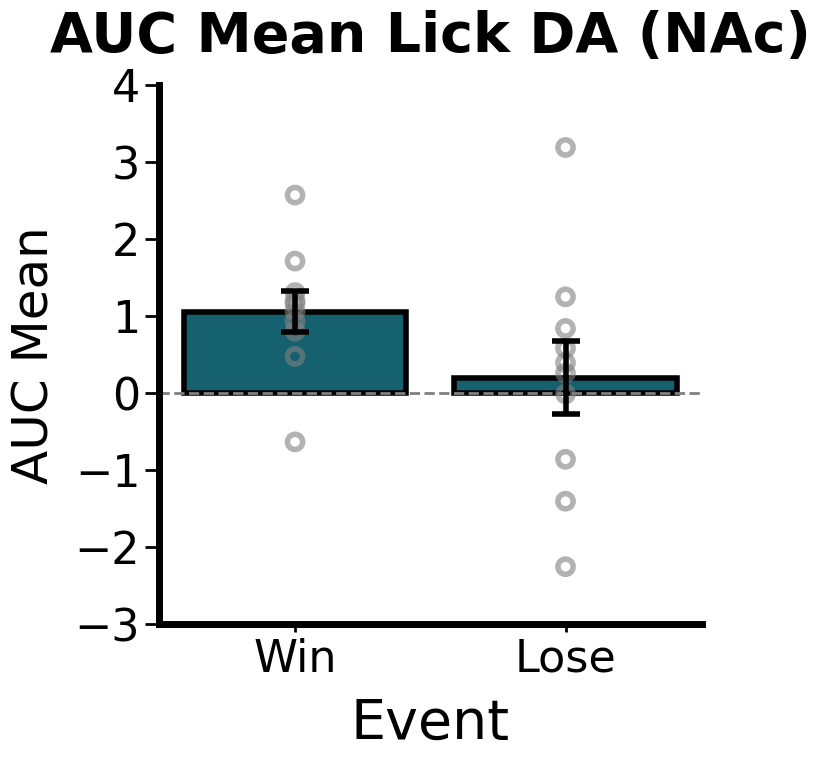

    Lick AUC Mean
10      -1.467807
11      -0.756872
12      -1.743205
13       3.452840
14      -1.616337
15      -5.099315
16      -1.451608
17      -1.614827
18      -0.046332
19       0.934716
20       1.718731
21       1.492378
22      -0.128329
23       0.054576
24       3.982610
25       3.058885
    Lick AUC Mean
10      -0.933205
11       0.085178
12      -1.999687
13      -1.007406
14       1.656217
15      -1.385299
16      -0.142574
17       0.393325
18      -1.007120
19       0.581634
20       0.731203
21       0.464337
22       0.106457
23      -0.695798
24       1.322922
25      -0.153329
Index(['Lick AUC Mean'], dtype='object')
Processing column: Lick AUC Mean
df: 10   -1.467807
11   -0.756872
12   -1.743205
13    3.452840
14   -1.616337
15   -5.099315
16   -1.451608
17   -1.614827
18   -0.046332
19    0.934716
20    1.718731
21    1.492378
22   -0.128329
23    0.054576
24    3.982610
25    3.058885
Name: Lick AUC Mean, dtype: float64
df1: 10   -0.933205
11    0.085178

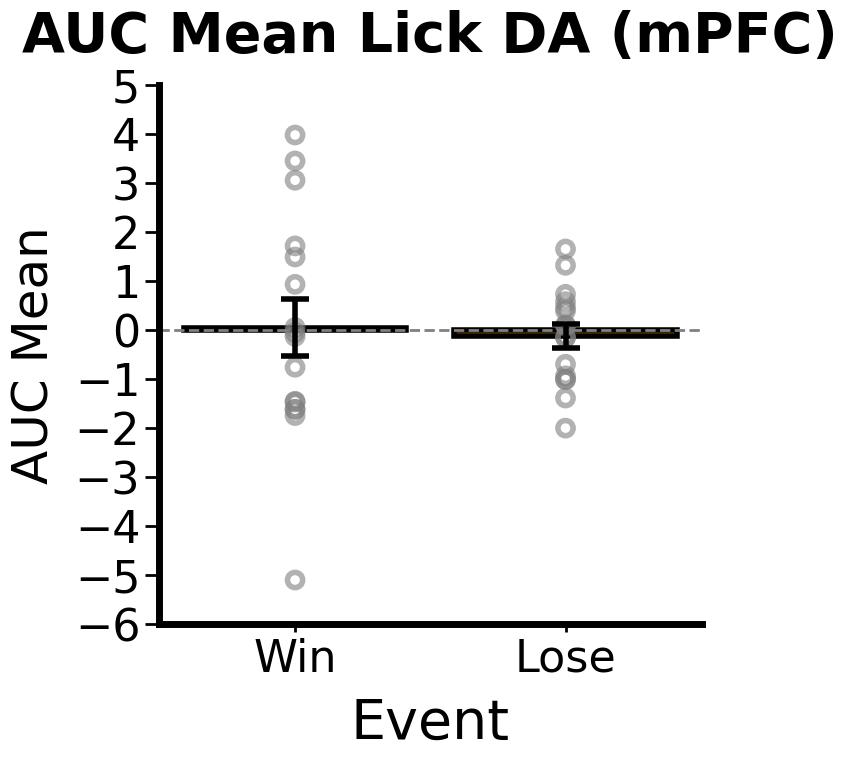

   Tone AUC Mean
0       1.270282
1       4.403021
2       7.893375
3       3.419640
4       9.196625
5       3.216032
6       7.882406
7       9.272953
8       8.450683
9       4.183761
   Tone AUC Mean
0      -1.021174
1      -1.461453
2       0.185913
3      -1.072950
4       0.278777
5      -0.409468
6      -0.208643
7       0.041225
8       0.608398
9       3.394565
Index(['Tone AUC Mean'], dtype='object')
Processing column: Tone AUC Mean
df: 0    1.270282
1    4.403021
2    7.893375
3    3.419640
4    9.196625
5    3.216032
6    7.882406
7    9.272953
8    8.450683
9    4.183761
Name: Tone AUC Mean, dtype: float64
df1: 0   -1.021174
1   -1.461453
2    0.185913
3   -1.072950
4    0.278777
5   -0.409468
6   -0.208643
7    0.041225
8    0.608398
9    3.394565
Name: Tone AUC Mean, dtype: float64
T-test for Tone AUC Mean and Tone AUC Mean: t=5.785, p=6.921e-05


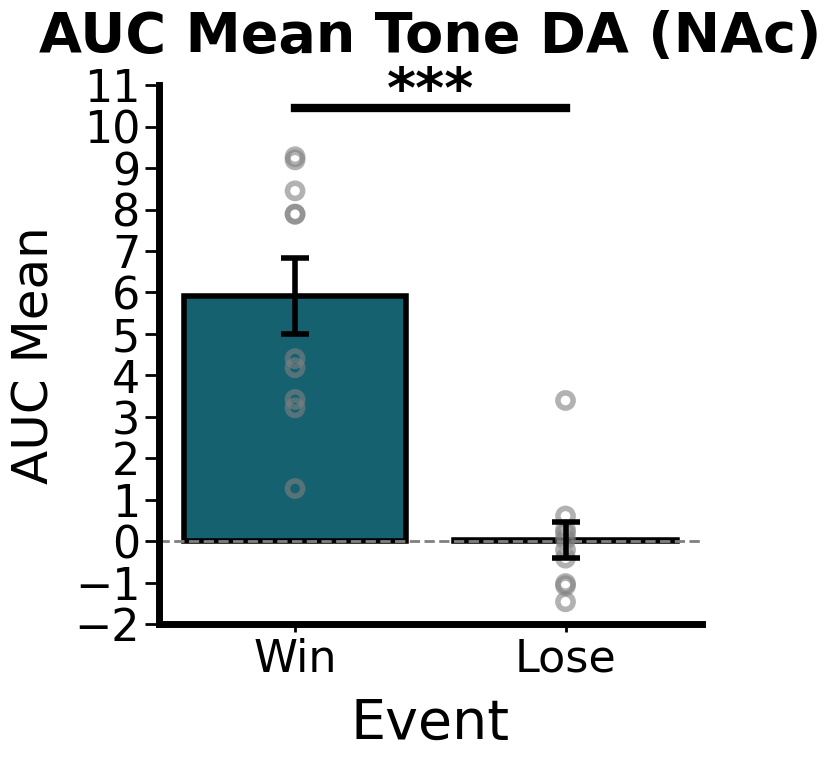

    Tone AUC Mean
10       0.897425
11       0.965789
12      -0.540744
13      -0.057394
14      -0.723649
15      -2.347468
16      -0.838472
17       2.345258
18       0.263873
19       1.025731
20       1.164015
21       0.765720
22       1.574888
23       0.108441
24       1.291557
25       1.753285
    Tone AUC Mean
10       0.084989
11      -0.202468
12      -0.967699
13       0.257268
14       2.268358
15       1.301386
16      -0.350815
17      -1.378931
18      -0.354542
19      -0.615965
20       4.265180
21       0.098943
22       0.533755
23       1.039082
24       1.749092
25      -0.929080
Index(['Tone AUC Mean'], dtype='object')
Processing column: Tone AUC Mean
df: 10    0.897425
11    0.965789
12   -0.540744
13   -0.057394
14   -0.723649
15   -2.347468
16   -0.838472
17    2.345258
18    0.263873
19    1.025731
20    1.164015
21    0.765720
22    1.574888
23    0.108441
24    1.291557
25    1.753285
Name: Tone AUC Mean, dtype: float64
df1: 10    0.084989
11   -0.202468

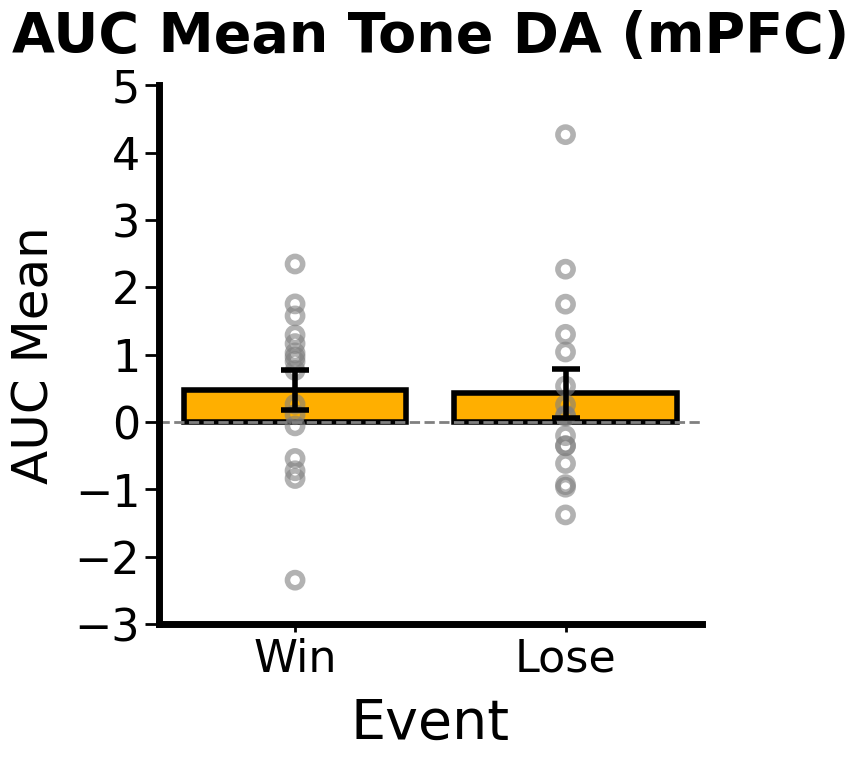

   Lick Max Peak Mean
0            1.470145
1            4.420194
2            2.069786
3            2.093122
4            2.334844
5            2.449481
6            2.701497
7            2.249138
8            1.795745
9            3.176581
   Lick Max Peak Mean
0            1.104507
1            2.765237
2            3.318907
3            2.878784
4            2.333853
5            1.773027
6            1.818876
7            1.776173
8            1.872413
9            2.874809
Index(['Lick Max Peak Mean'], dtype='object')
Processing column: Lick Max Peak Mean
df: 0    1.470145
1    4.420194
2    2.069786
3    2.093122
4    2.334844
5    2.449481
6    2.701497
7    2.249138
8    1.795745
9    3.176581
Name: Lick Max Peak Mean, dtype: float64
df1: 0    1.104507
1    2.765237
2    3.318907
3    2.878784
4    2.333853
5    1.773027
6    1.818876
7    1.776173
8    1.872413
9    2.874809
Name: Lick Max Peak Mean, dtype: float64
T-test for Lick Max Peak Mean and Lick Max Peak Mean: t=0.658

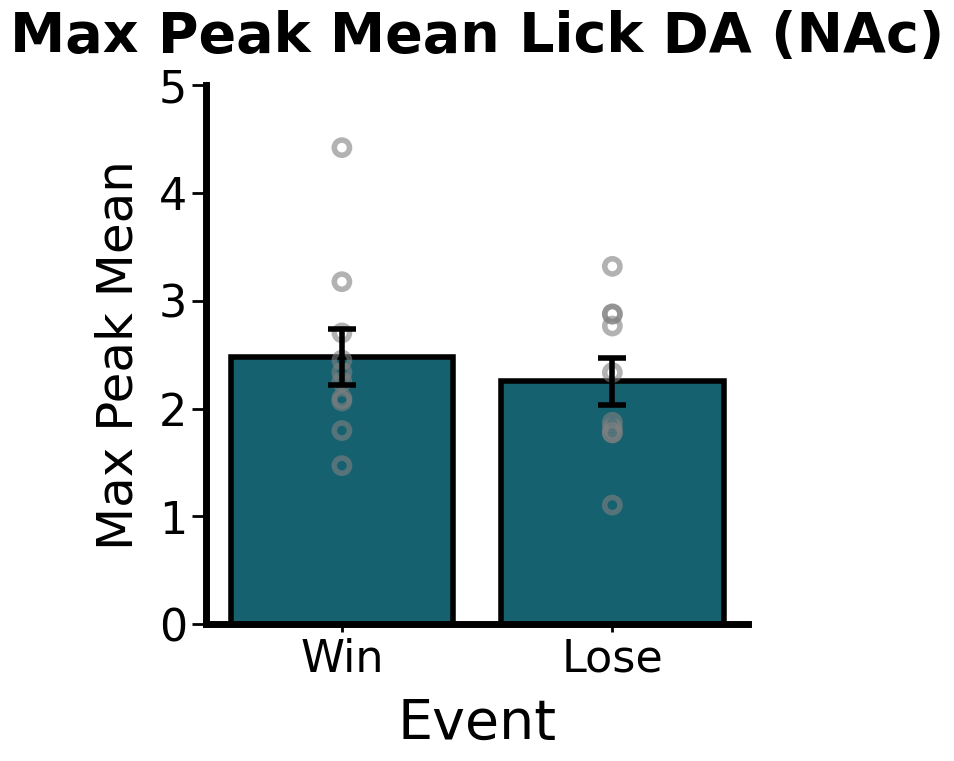

    Lick Max Peak Mean
10            1.665898
11            2.136007
12            0.771456
13            1.473885
14            1.137368
15            0.678887
16            0.901487
17            1.023474
18            1.912841
19            2.539035
20            2.334955
21            2.442177
22            1.698928
23            2.040242
24            1.780988
25            2.238429
    Lick Max Peak Mean
10            1.383574
11            2.099898
12            1.199915
13            1.041398
14            1.515273
15            0.804439
16            1.356002
17            1.367037
18            1.957401
19            2.242293
20            2.020415
21            1.949862
22            1.650623
23            0.798388
24            1.680201
25            1.578580
Index(['Lick Max Peak Mean'], dtype='object')
Processing column: Lick Max Peak Mean
df: 10    1.665898
11    2.136007
12    0.771456
13    1.473885
14    1.137368
15    0.678887
16    0.901487
17    1.023474
18    1.91

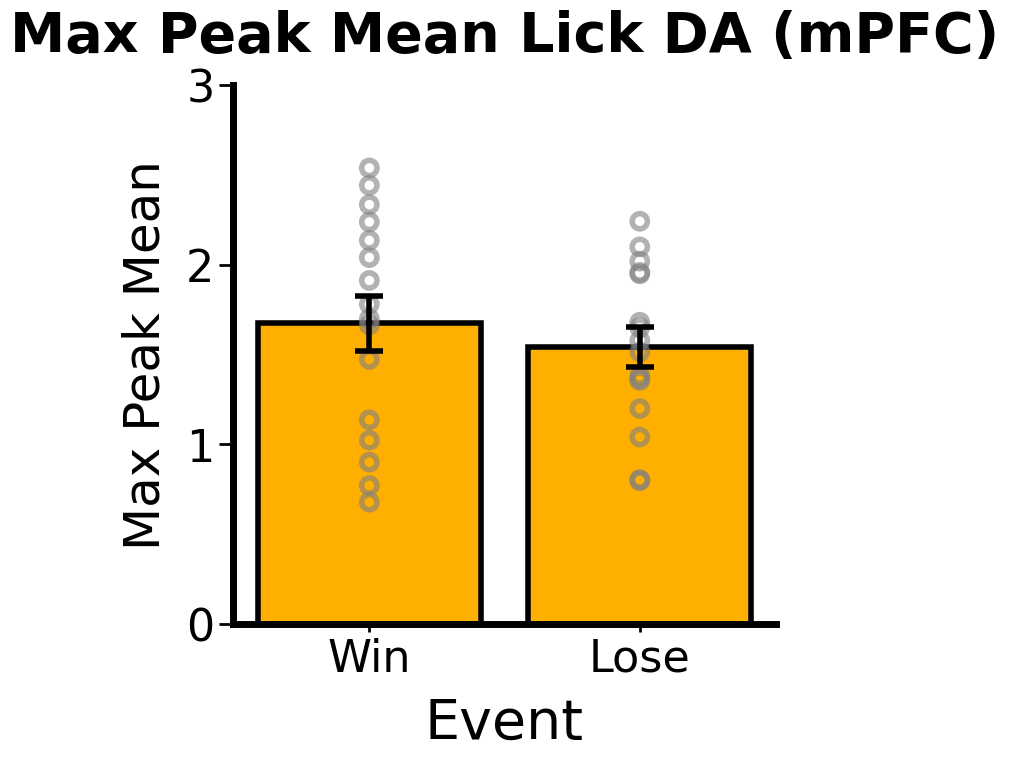

   Tone Max Peak Mean
0            1.950336
1            6.415882
2            5.209594
3            4.836668
4            5.810470
5            3.015100
6            5.371232
7            5.750614
8            6.291988
9            4.190570
   Tone Max Peak Mean
0            1.057434
1            2.065823
2            1.978758
3            2.489465
4            2.796126
5            1.412971
6            2.309112
7            2.037947
8            3.263548
9            3.355223
Index(['Tone Max Peak Mean'], dtype='object')
Processing column: Tone Max Peak Mean
df: 0    1.950336
1    6.415882
2    5.209594
3    4.836668
4    5.810470
5    3.015100
6    5.371232
7    5.750614
8    6.291988
9    4.190570
Name: Tone Max Peak Mean, dtype: float64
df1: 0    1.057434
1    2.065823
2    1.978758
3    2.489465
4    2.796126
5    1.412971
6    2.309112
7    2.037947
8    3.263548
9    3.355223
Name: Tone Max Peak Mean, dtype: float64
T-test for Tone Max Peak Mean and Tone Max Peak Mean: t=5.077

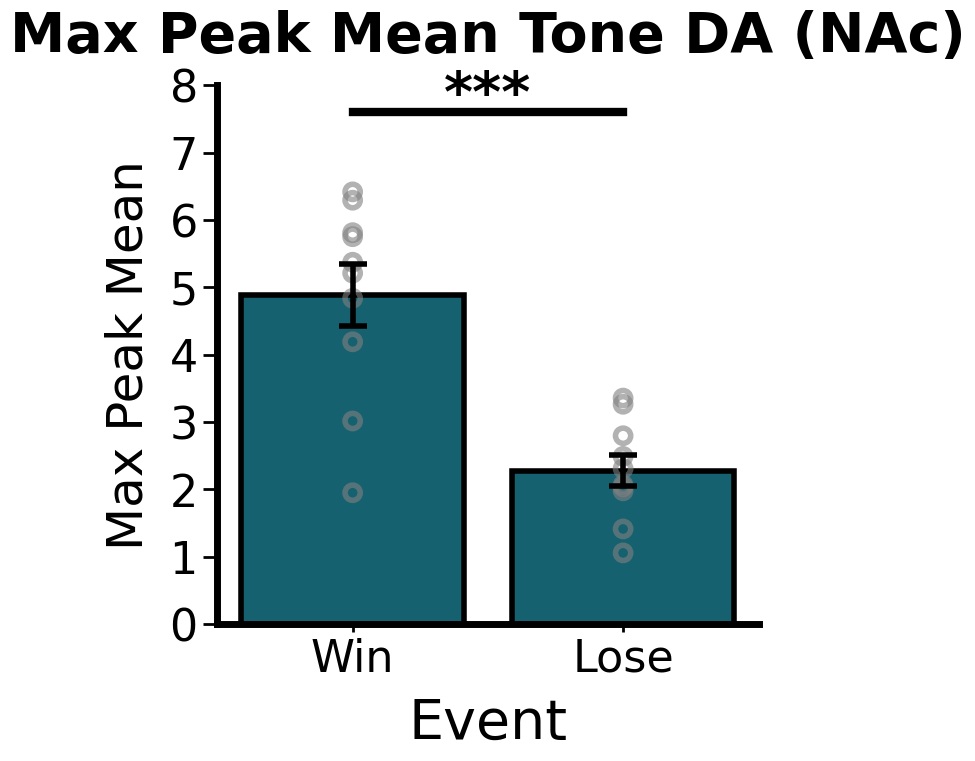

    Tone Max Peak Mean
10            1.674282
11            2.397540
12            1.133262
13            1.434177
14            1.159393
15            0.798024
16            1.216226
17            1.509102
18            2.125364
19            2.032940
20            2.204038
21            2.076292
22            1.875751
23            1.438171
24            1.877956
25            1.991572
    Tone Max Peak Mean
10            1.679661
11            2.093970
12            1.399915
13            1.542289
14            1.845609
15            1.516128
16            1.428341
17            1.180184
18            2.296129
19            1.761738
20            2.912796
21            2.355085
22            1.739032
23            1.784724
24            1.925953
25            1.675924
Index(['Tone Max Peak Mean'], dtype='object')
Processing column: Tone Max Peak Mean
df: 10    1.674282
11    2.397540
12    1.133262
13    1.434177
14    1.159393
15    0.798024
16    1.216226
17    1.509102
18    2.12

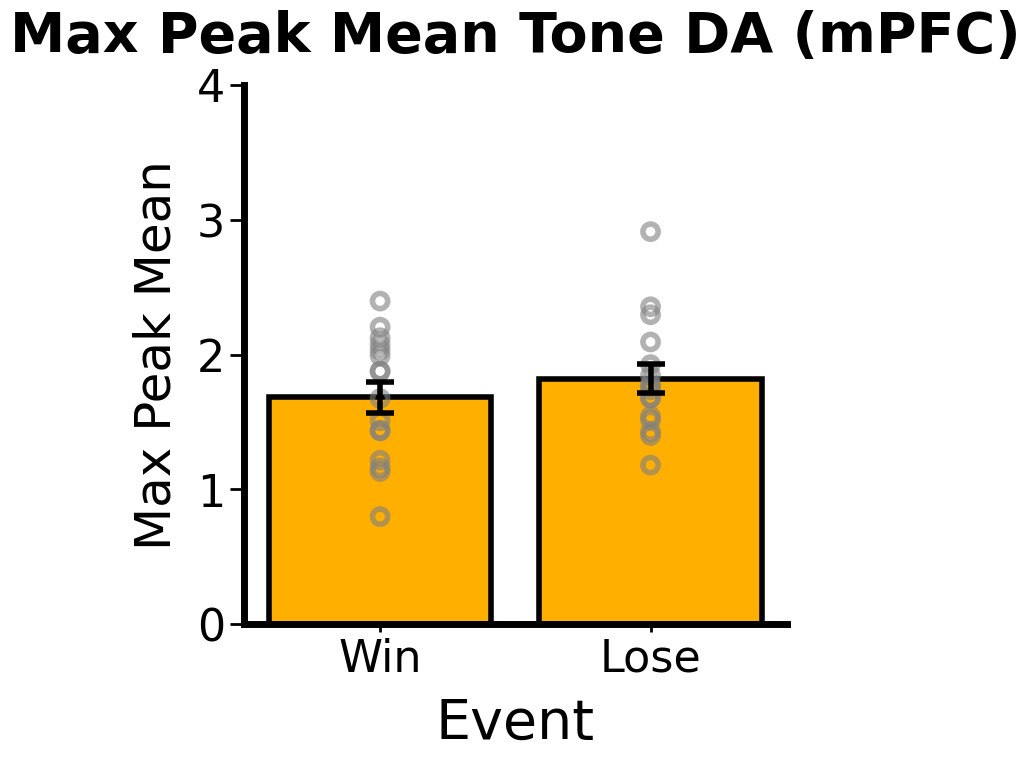

   Lick Mean Z-score Mean
0                0.691608
1                0.423657
2                0.768632
3                0.577313
4                0.207653
5                1.415789
6                1.383962
7                0.649185
8                0.566387
9                1.616671
   Lick Mean Z-score Mean
0                0.147515
1                0.646339
2                0.977984
3                0.796703
4                0.468080
5                0.623265
6                0.408820
7                0.662713
8                0.539899
9                1.471349
Index(['Lick Mean Z-score Mean'], dtype='object')
Processing column: Lick Mean Z-score Mean
df: 0    0.691608
1    0.423657
2    0.768632
3    0.577313
4    0.207653
5    1.415789
6    1.383962
7    0.649185
8    0.566387
9    1.616671
Name: Lick Mean Z-score Mean, dtype: float64
df1: 0    0.147515
1    0.646339
2    0.977984
3    0.796703
4    0.468080
5    0.623265
6    0.408820
7    0.662713
8    0.539899
9    1.471349
Na

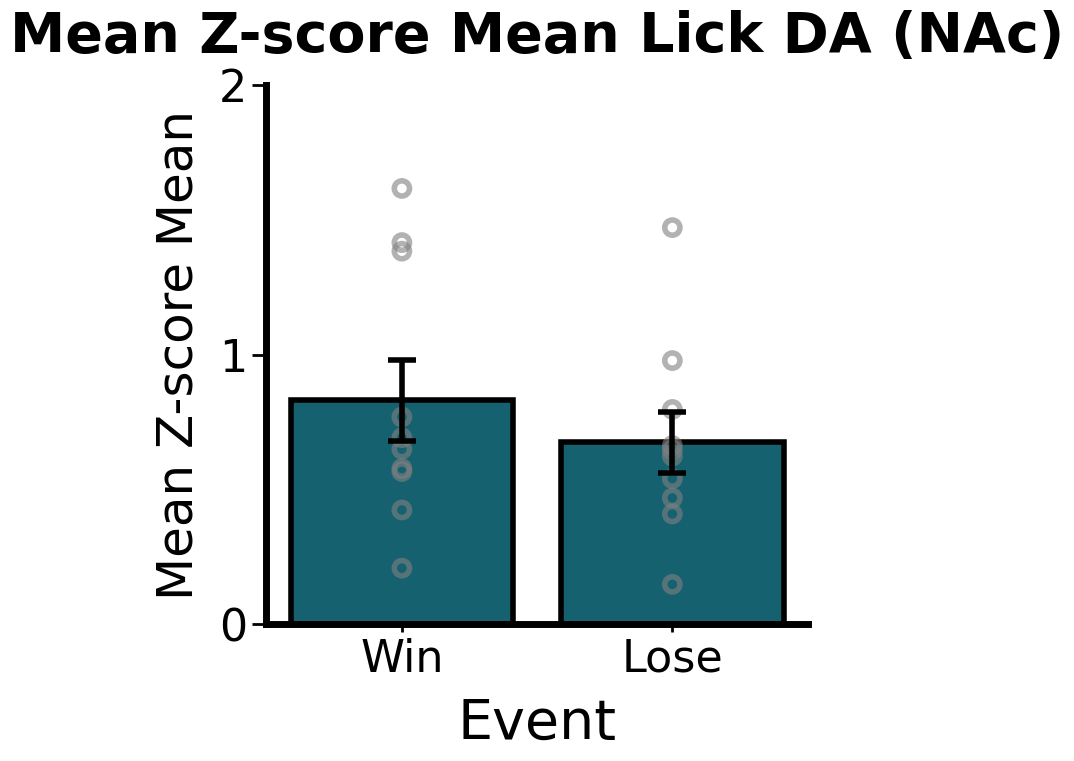

    Lick Mean Z-score Mean
10                0.343694
11                0.406650
12               -0.110537
13                0.414866
14               -0.072472
15               -0.416499
16                0.039865
17                0.322959
18                0.137639
19                0.680615
20                0.519951
21                0.358808
22                0.370500
23                0.632726
24                0.430413
25                0.615477
    Lick Mean Z-score Mean
10                0.135793
11                0.261222
12                0.295133
13                0.179863
14                0.341360
15               -0.092667
16                0.278255
17                0.079429
18                0.138416
19                0.576944
20                0.345840
21                0.274061
22                0.209096
23                0.200818
24                0.632233
25                0.195516
Index(['Lick Mean Z-score Mean'], dtype='object')
Processing column: Lick Mean Z-s

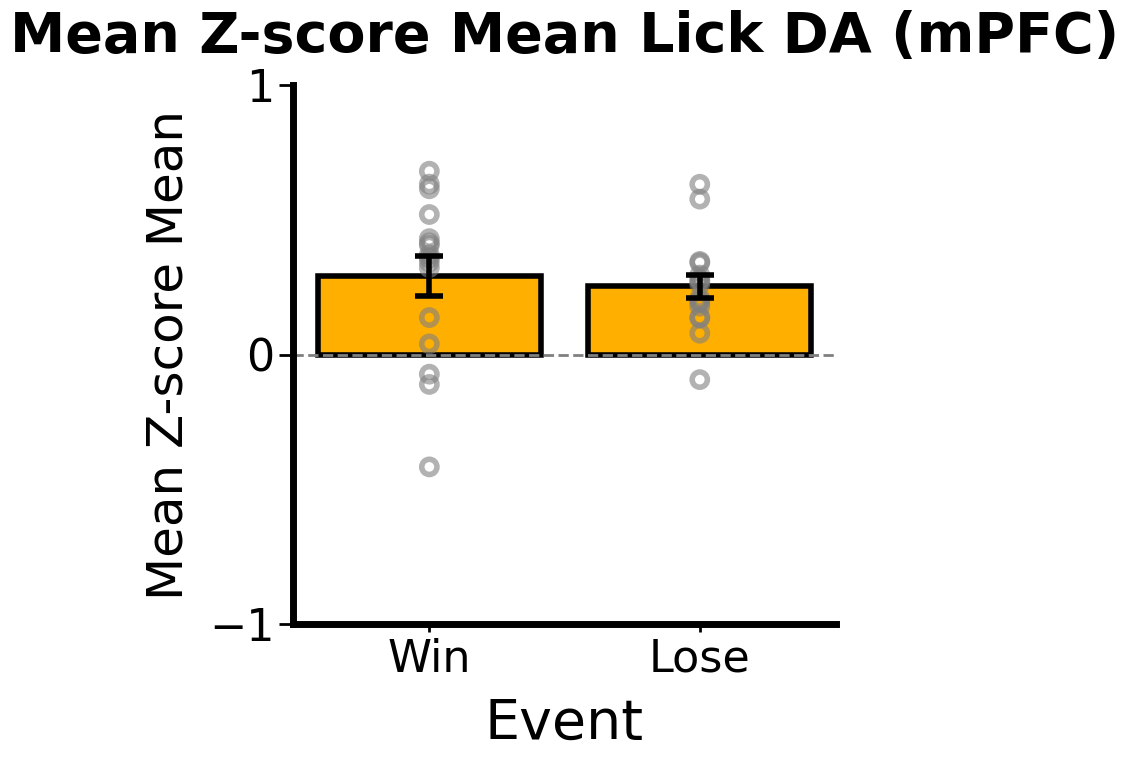

   Tone Mean Z-score Mean
0                0.211765
1                0.733906
2                1.315777
3                0.569974
4                1.532801
5                0.536020
6                1.313814
7                1.545794
8                1.408511
9                0.697331
   Tone Mean Z-score Mean
0               -0.170224
1               -0.243599
2                0.031009
3               -0.178854
4                0.046456
5               -0.068269
6               -0.034814
7                0.006837
8                0.101398
9                0.565772
Index(['Tone Mean Z-score Mean'], dtype='object')
Processing column: Tone Mean Z-score Mean
df: 0    0.211765
1    0.733906
2    1.315777
3    0.569974
4    1.532801
5    0.536020
6    1.313814
7    1.545794
8    1.408511
9    0.697331
Name: Tone Mean Z-score Mean, dtype: float64
df1: 0   -0.170224
1   -0.243599
2    0.031009
3   -0.178854
4    0.046456
5   -0.068269
6   -0.034814
7    0.006837
8    0.101398
9    0.565772
Na

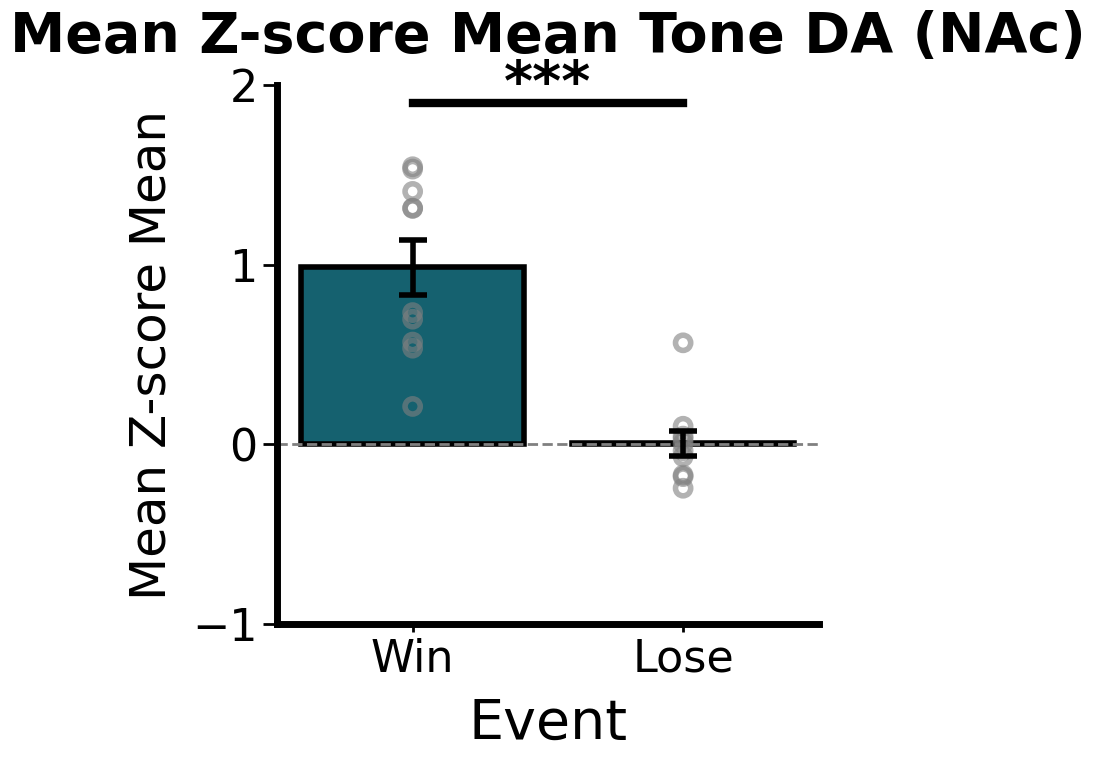

    Tone Mean Z-score Mean
10                0.149639
11                0.161009
12               -0.090149
13               -0.009554
14               -0.120611
15               -0.391268
16               -0.139713
17                0.390951
18                0.043967
19                0.170990
20                0.194024
21                0.127624
22                0.262563
23                0.018081
24                0.215275
25                0.292278
    Tone Mean Z-score Mean
10                0.014153
11               -0.033723
12               -0.161320
13                0.042878
14                0.378149
15                0.216923
16               -0.058511
17               -0.229881
18               -0.059100
19               -0.102700
20                0.710921
21                0.016521
22                0.089001
23                0.173204
24                0.291586
25               -0.154892
Index(['Tone Mean Z-score Mean'], dtype='object')
Processing column: Tone Mean Z-s

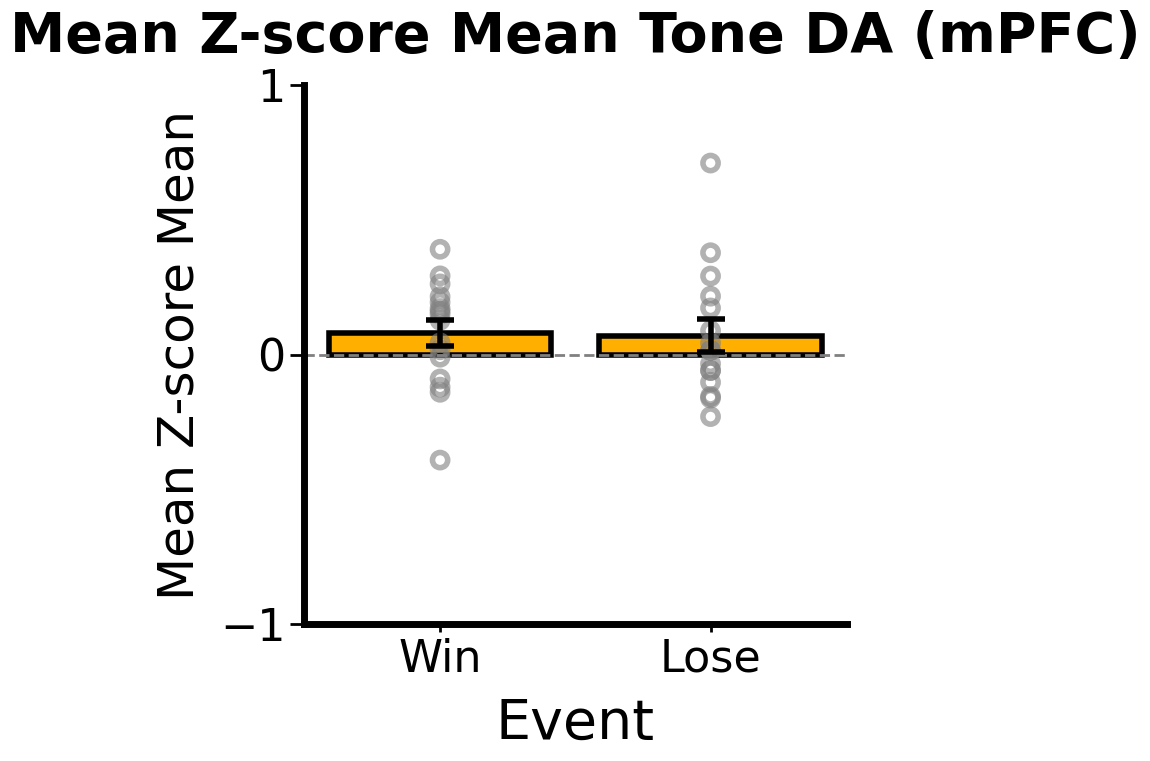

   Lick AUC Mean EI
0          0.137246
1          4.320181
2          8.816617
3          4.070672
4          7.699902
5          3.736769
6          7.332329
7          8.599980
8          8.040366
9          6.523024
   Lick AUC Mean EI
0         -0.296051
1          0.399542
2          1.263930
3          0.128181
4          2.061186
5          0.258780
6          1.504254
7          1.731991
8          2.168842
9          5.347932
Index(['Lick AUC Mean EI'], dtype='object')
Processing column: Lick AUC Mean EI
df: 0    0.137246
1    4.320181
2    8.816617
3    4.070672
4    7.699902
5    3.736769
6    7.332329
7    8.599980
8    8.040366
9    6.523024
Name: Lick AUC Mean EI, dtype: float64
df1: 0   -0.296051
1    0.399542
2    1.263930
3    0.128181
4    2.061186
5    0.258780
6    1.504254
7    1.731991
8    2.168842
9    5.347932
Name: Lick AUC Mean EI, dtype: float64
T-test for Lick AUC Mean EI and Lick AUC Mean EI: t=4.391, p=5.727e-04


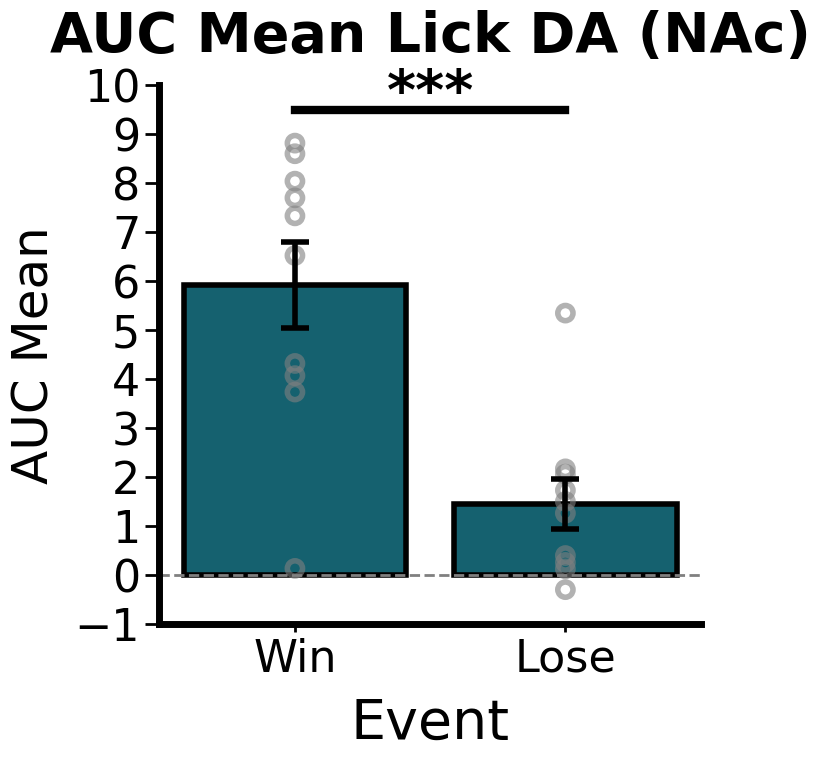

    Lick AUC Mean EI
10          0.271257
11          0.755509
12          0.897418
13          0.906978
14          0.208832
15          3.002736
16         -0.060252
17          0.356441
18          1.403037
19          2.602724
20          0.756939
21          0.761562
22          0.976726
23          0.543964
24          1.220656
25          1.081547
    Lick AUC Mean EI
10          0.030044
11         -0.018759
12         -0.184700
13         -0.168946
14          0.186677
15          0.190491
16         -0.381906
17          0.082725
18         -1.370819
19          0.235055
20         -0.317426
21         -1.248085
22          0.050671
23          1.688480
24          1.263432
25         -0.086689
Index(['Lick AUC Mean EI'], dtype='object')
Processing column: Lick AUC Mean EI
df: 10    0.271257
11    0.755509
12    0.897418
13    0.906978
14    0.208832
15    3.002736
16   -0.060252
17    0.356441
18    1.403037
19    2.602724
20    0.756939
21    0.761562
22    0.976726
23    0

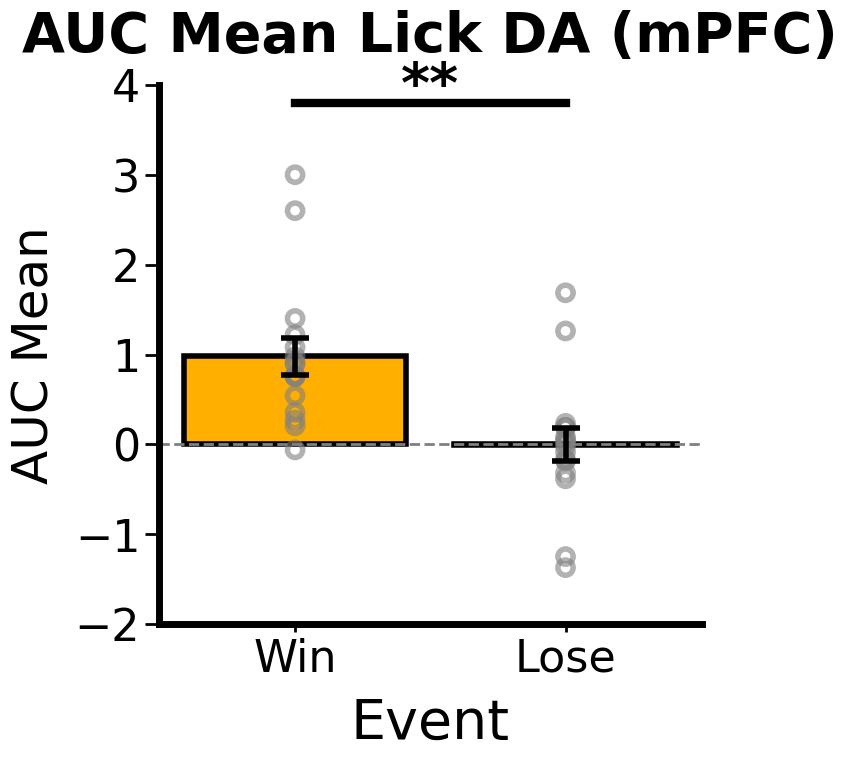

   Tone AUC Mean EI
0          0.137246
1          4.320181
2          8.816617
3          4.070672
4          7.699902
5          3.736769
6          7.332329
7          8.599980
8          8.040366
9          6.523024
   Tone AUC Mean EI
0         -0.296051
1          0.399542
2          1.263930
3          0.128181
4          2.061186
5          0.258780
6          1.504254
7          1.731991
8          2.168842
9          5.347932
Index(['Tone AUC Mean EI'], dtype='object')
Processing column: Tone AUC Mean EI
df: 0    0.137246
1    4.320181
2    8.816617
3    4.070672
4    7.699902
5    3.736769
6    7.332329
7    8.599980
8    8.040366
9    6.523024
Name: Tone AUC Mean EI, dtype: float64
df1: 0   -0.296051
1    0.399542
2    1.263930
3    0.128181
4    2.061186
5    0.258780
6    1.504254
7    1.731991
8    2.168842
9    5.347932
Name: Tone AUC Mean EI, dtype: float64
T-test for Tone AUC Mean EI and Tone AUC Mean EI: t=4.391, p=5.727e-04


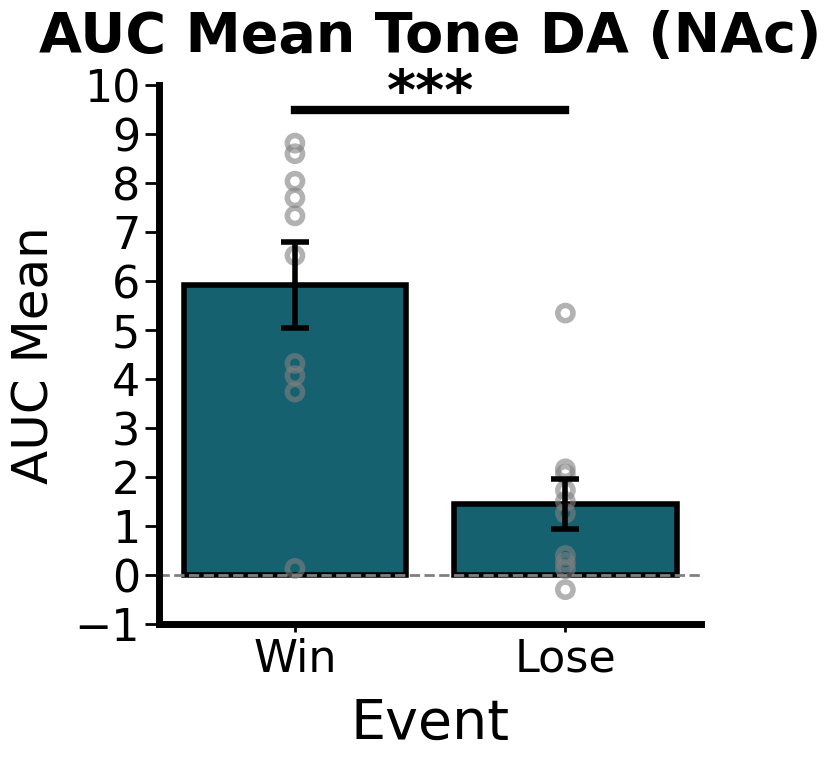

    Tone AUC Mean EI
10          0.271257
11          0.755509
12          0.897418
13          0.906978
14          0.208832
15          3.002736
16         -0.060252
17          0.356441
18          1.403037
19          2.602724
20          0.756939
21          0.761562
22          0.976726
23          0.543964
24          1.220656
25          1.081547
    Tone AUC Mean EI
10          0.030044
11         -0.018759
12         -0.184700
13         -0.168946
14          0.186677
15          0.190491
16         -0.381906
17          0.082725
18         -1.370819
19          0.235055
20         -0.317426
21         -1.248085
22          0.050671
23          1.688480
24          1.263432
25         -0.086689
Index(['Tone AUC Mean EI'], dtype='object')
Processing column: Tone AUC Mean EI
df: 10    0.271257
11    0.755509
12    0.897418
13    0.906978
14    0.208832
15    3.002736
16   -0.060252
17    0.356441
18    1.403037
19    2.602724
20    0.756939
21    0.761562
22    0.976726
23    0

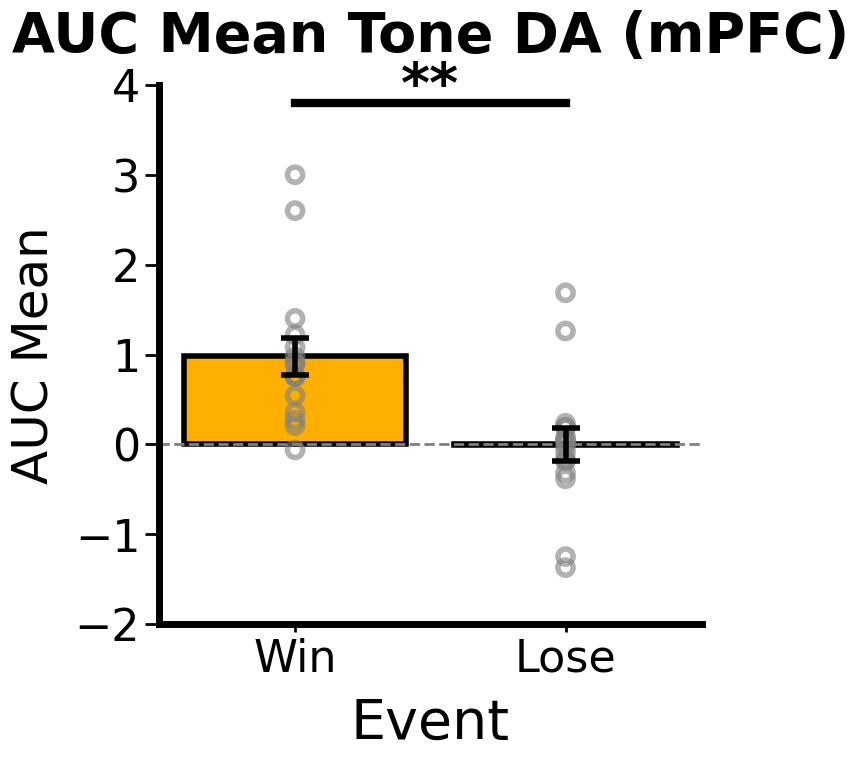

   Lick Max Peak Mean EI
0               1.761424
1               6.402071
2               5.363667
3               4.945139
4               5.561013
5               3.101855
6               5.279479
7               5.638301
8               6.223599
9               4.580500
   Lick Max Peak Mean EI
0               1.178135
1               2.375928
2               2.158301
3               2.689644
4               3.093045
5               1.524349
6               2.594627
7               2.319759
8               3.523630
9               3.680813
Index(['Lick Max Peak Mean EI'], dtype='object')
Processing column: Lick Max Peak Mean EI
df: 0    1.761424
1    6.402071
2    5.363667
3    4.945139
4    5.561013
5    3.101855
6    5.279479
7    5.638301
8    6.223599
9    4.580500
Name: Lick Max Peak Mean EI, dtype: float64
df1: 0    1.178135
1    2.375928
2    2.158301
3    2.689644
4    3.093045
5    1.524349
6    2.594627
7    2.319759
8    3.523630
9    3.680813
Name: Lick Max Peak Mean EI

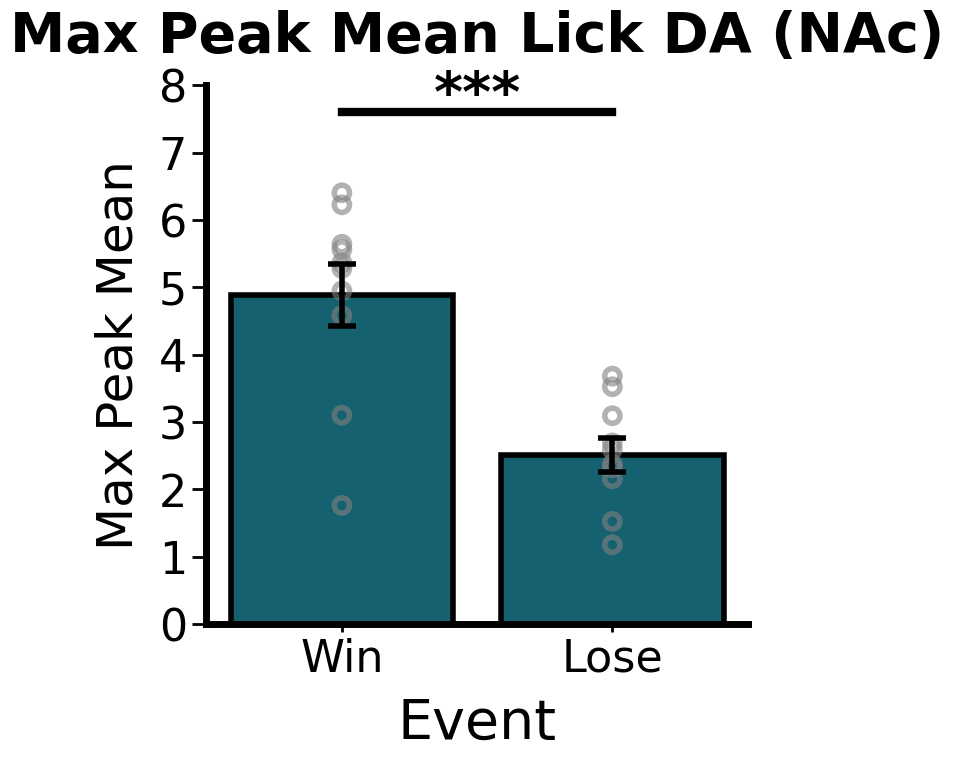

    Lick Max Peak Mean EI
10               1.569856
11               2.362332
12               1.372989
13               1.594945
14               1.314773
15               1.689839
16               1.345889
17               1.177453
18               2.315200
19               2.295725
20               2.136100
21               2.075523
22               1.776026
23               1.510512
24               1.866084
25               1.879487
    Lick Max Peak Mean EI
10               1.670440
11               2.124530
12               1.530420
13               1.471186
14               1.498560
15               1.330867
16               1.423124
17               1.423803
18               2.126619
19               1.903531
20               2.148757
21               2.129257
22               1.658398
23               1.892903
24               1.844951
25               1.816268
Index(['Lick Max Peak Mean EI'], dtype='object')
Processing column: Lick Max Peak Mean EI
df: 10    1.569856
11    2

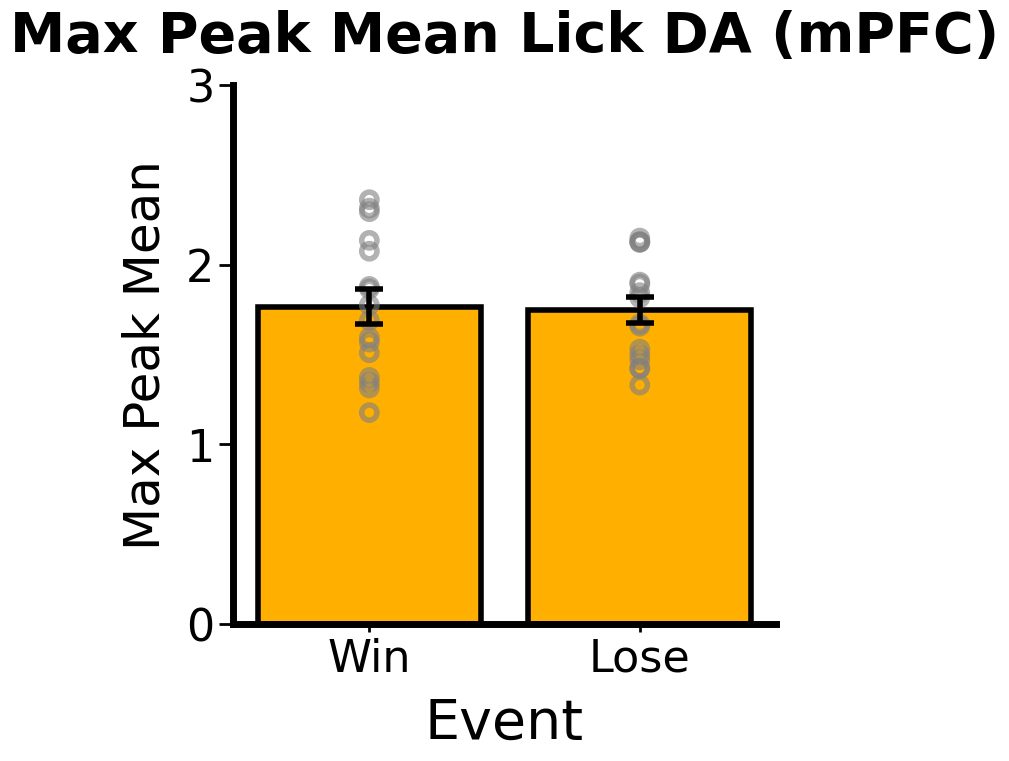

   Tone Max Peak Mean EI
0               1.761424
1               6.402071
2               5.363667
3               4.945139
4               5.561013
5               3.101855
6               5.279479
7               5.638301
8               6.223599
9               4.580500
   Tone Max Peak Mean EI
0               1.178135
1               2.375928
2               2.158301
3               2.689644
4               3.093045
5               1.524349
6               2.594627
7               2.319759
8               3.523630
9               3.680813
Index(['Tone Max Peak Mean EI'], dtype='object')
Processing column: Tone Max Peak Mean EI
df: 0    1.761424
1    6.402071
2    5.363667
3    4.945139
4    5.561013
5    3.101855
6    5.279479
7    5.638301
8    6.223599
9    4.580500
Name: Tone Max Peak Mean EI, dtype: float64
df1: 0    1.178135
1    2.375928
2    2.158301
3    2.689644
4    3.093045
5    1.524349
6    2.594627
7    2.319759
8    3.523630
9    3.680813
Name: Tone Max Peak Mean EI

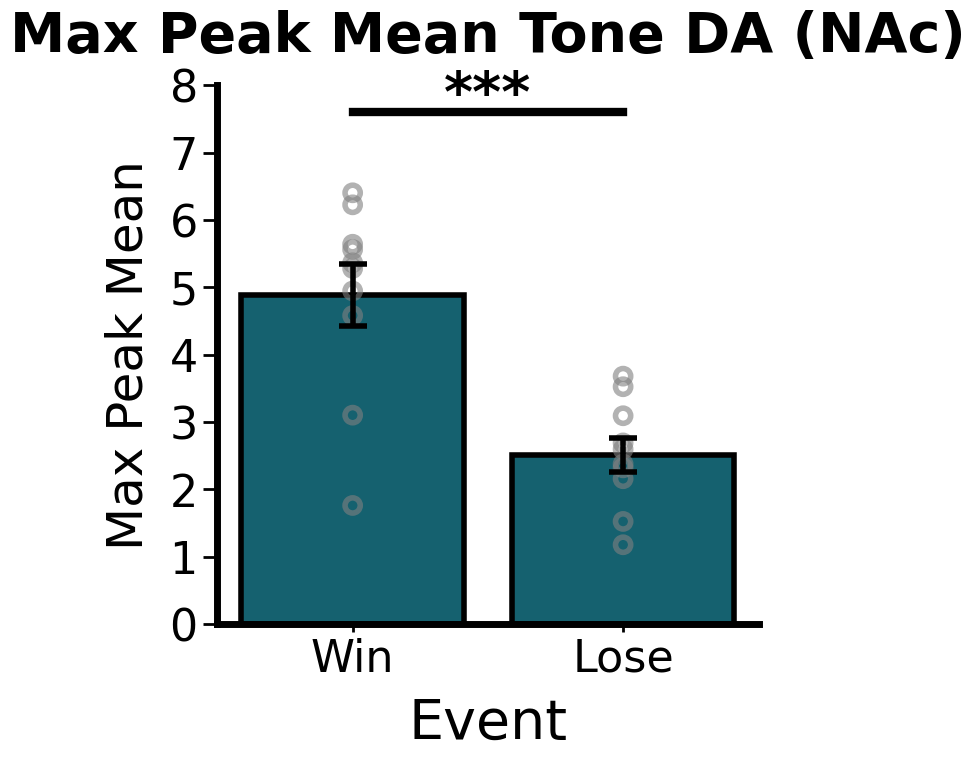

    Tone Max Peak Mean EI
10               1.569856
11               2.362332
12               1.372989
13               1.594945
14               1.314773
15               1.689839
16               1.345889
17               1.177453
18               2.315200
19               2.295725
20               2.136100
21               2.075523
22               1.776026
23               1.510512
24               1.866084
25               1.879487
    Tone Max Peak Mean EI
10               1.670440
11               2.124530
12               1.530420
13               1.471186
14               1.498560
15               1.330867
16               1.423124
17               1.423803
18               2.126619
19               1.903531
20               2.148757
21               2.129257
22               1.658398
23               1.892903
24               1.844951
25               1.816268
Index(['Tone Max Peak Mean EI'], dtype='object')
Processing column: Tone Max Peak Mean EI
df: 10    1.569856
11    2

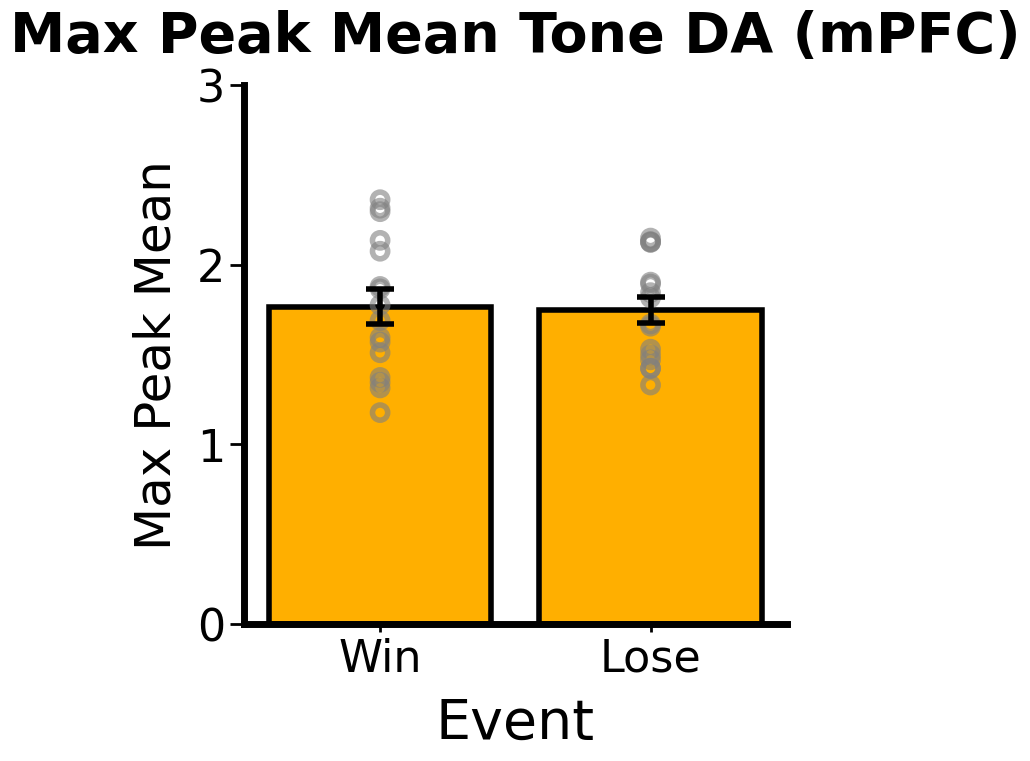

   Lick Mean Z-score Mean EI
0                   0.022903
1                   0.720178
2                   1.469839
3                   0.678547
4                   1.283489
5                   0.622893
6                   1.222200
7                   1.433709
8                   1.340264
9                   1.087356
   Lick Mean Z-score Mean EI
0                  -0.049363
1                   0.066629
2                   0.210704
3                   0.021374
4                   0.343592
5                   0.043137
6                   0.250736
7                   0.288698
8                   0.361532
9                   0.891450
Index(['Lick Mean Z-score Mean EI'], dtype='object')
Processing column: Lick Mean Z-score Mean EI
df: 0    0.022903
1    0.720178
2    1.469839
3    0.678547
4    1.283489
5    0.622893
6    1.222200
7    1.433709
8    1.340264
9    1.087356
Name: Lick Mean Z-score Mean EI, dtype: float64
df1: 0   -0.049363
1    0.066629
2    0.210704
3    0.021374
4    0.3435

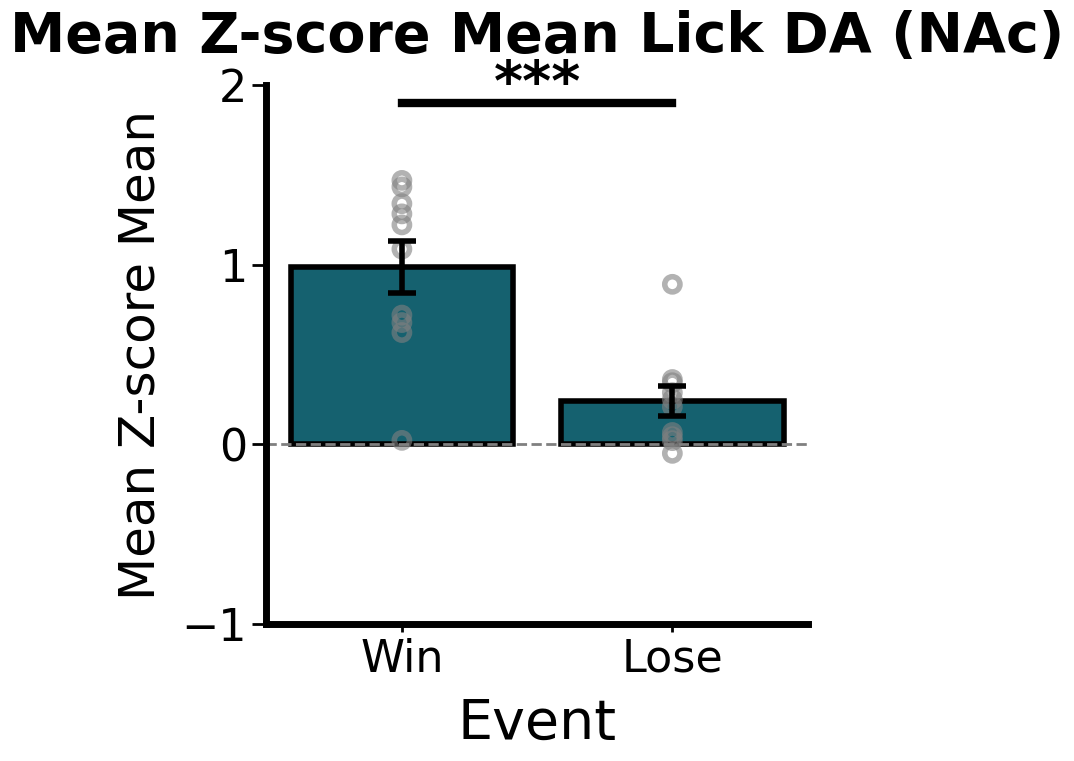

    Lick Mean Z-score Mean EI
10                   0.045261
11                   0.125976
12                   0.149614
13                   0.151223
14                   0.034824
15                   0.500596
16                  -0.010006
17                   0.059449
18                   0.233895
19                   0.433898
20                   0.126179
21                   0.126945
22                   0.162872
23                   0.090694
24                   0.203485
25                   0.180306
    Lick Mean Z-score Mean EI
10                   0.004991
11                  -0.003092
12                  -0.030784
13                  -0.028158
14                   0.031125
15                   0.031752
16                  -0.063664
17                   0.013776
18                  -0.228533
19                   0.039166
20                  -0.052969
21                  -0.208039
22                   0.008480
23                   0.281448
24                   0.210631
25        

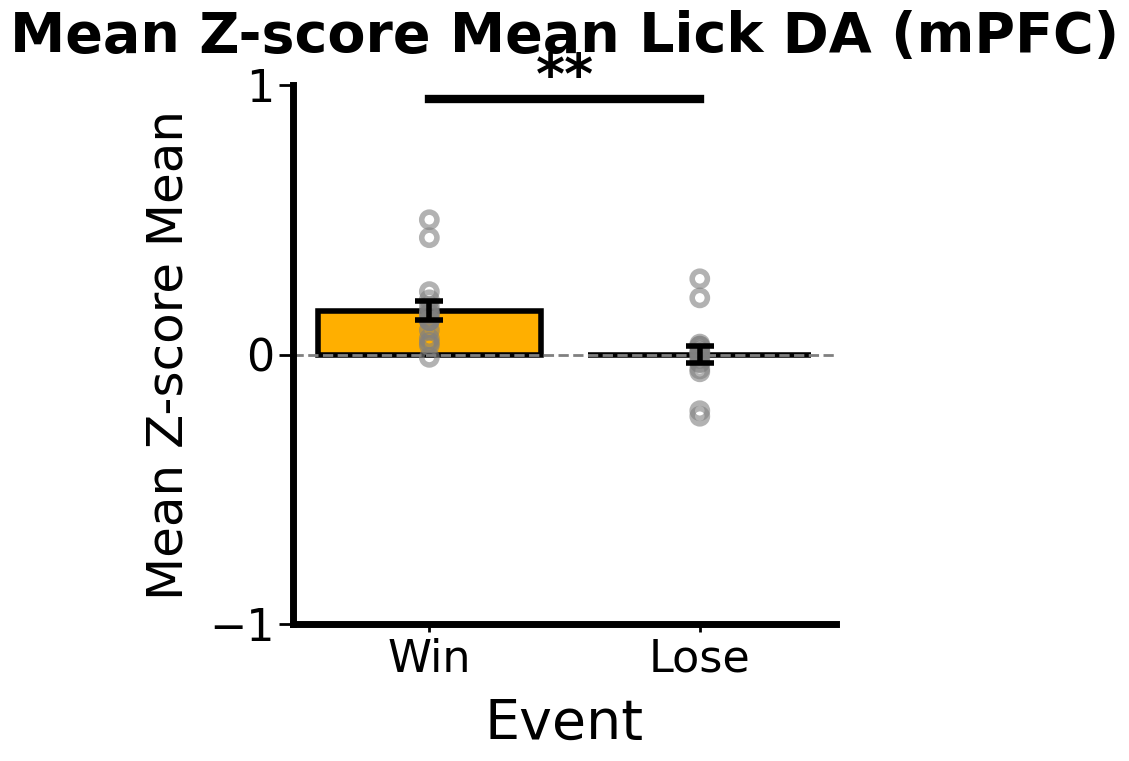

   Tone Mean Z-score Mean EI
0                   0.022903
1                   0.720178
2                   1.469839
3                   0.678547
4                   1.283489
5                   0.622893
6                   1.222200
7                   1.433709
8                   1.340264
9                   1.087356
   Tone Mean Z-score Mean EI
0                  -0.049363
1                   0.066629
2                   0.210704
3                   0.021374
4                   0.343592
5                   0.043137
6                   0.250736
7                   0.288698
8                   0.361532
9                   0.891450
Index(['Tone Mean Z-score Mean EI'], dtype='object')
Processing column: Tone Mean Z-score Mean EI
df: 0    0.022903
1    0.720178
2    1.469839
3    0.678547
4    1.283489
5    0.622893
6    1.222200
7    1.433709
8    1.340264
9    1.087356
Name: Tone Mean Z-score Mean EI, dtype: float64
df1: 0   -0.049363
1    0.066629
2    0.210704
3    0.021374
4    0.3435

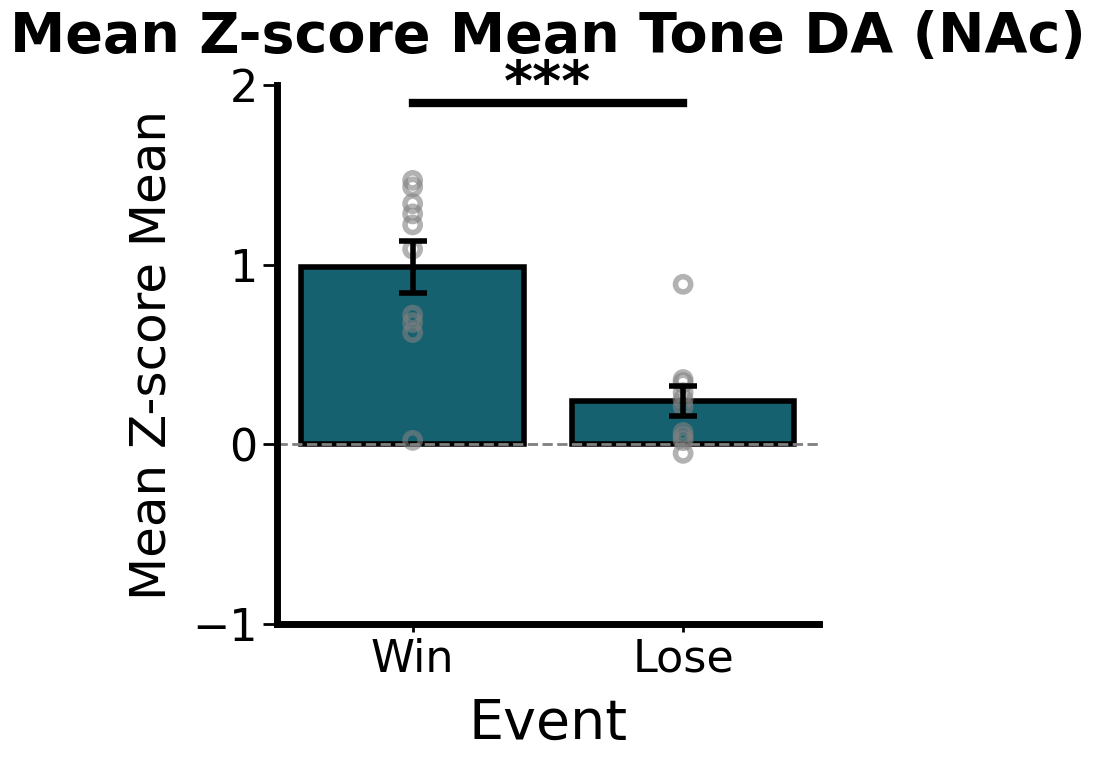

    Tone Mean Z-score Mean EI
10                   0.045261
11                   0.125976
12                   0.149614
13                   0.151223
14                   0.034824
15                   0.500596
16                  -0.010006
17                   0.059449
18                   0.233895
19                   0.433898
20                   0.126179
21                   0.126945
22                   0.162872
23                   0.090694
24                   0.203485
25                   0.180306
    Tone Mean Z-score Mean EI
10                   0.004991
11                  -0.003092
12                  -0.030784
13                  -0.028158
14                   0.031125
15                   0.031752
16                  -0.063664
17                   0.013776
18                  -0.228533
19                   0.039166
20                  -0.052969
21                  -0.208039
22                   0.008480
23                   0.281448
24                   0.210631
25        

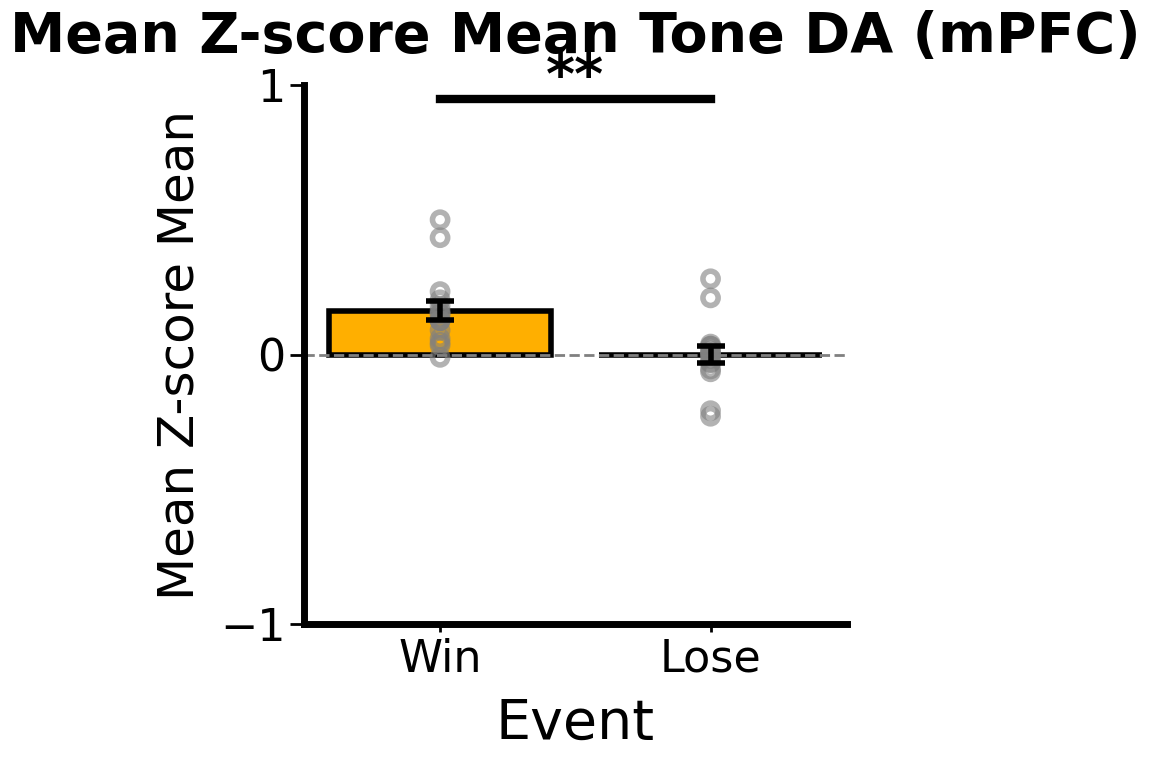

In [11]:
exp.plot_conditional(df_winning1, df_losing1, method='', metric_name='AUC Mean', directory_path=directory_path3)
exp.plot_conditional(df_winning1, df_losing1, method='', metric_name='Max Peak Mean', directory_path=directory_path3)
exp.plot_conditional(df_winning1, df_losing1, method='', metric_name='Mean Z-score Mean', directory_path=directory_path3)
exp.plot_conditional(df_winning1, df_losing1, method=' EI', metric_name='AUC Mean', directory_path=directory_path2)
exp.plot_conditional(df_winning1, df_losing1, method=' EI', metric_name='Max Peak Mean', directory_path=directory_path2)
exp.plot_conditional(df_winning1, df_losing1, method=' EI', metric_name='Mean Z-score Mean', directory_path=directory_path2)

    Tone AUC First
10        2.143522
11        2.763247
12        1.814885
13       -2.340388
14       -2.256093
15       -2.070608
16       -5.542970
17        4.909222
18        5.433326
19        0.450262
20        1.654167
21        0.231043
22        2.800954
23        5.842295
24       -0.624519
25        1.313549
    Tone AUC Last
10      -0.160801
11       0.293014
12      -2.340302
13      -7.253570
14       3.822303
15      -3.953507
16      -1.560017
17       1.890694
18       0.209186
19       1.816466
20       0.865364
21       1.375690
22       2.105592
23       2.922507
24       0.146485
25       1.983416
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 10    2.143522
11    2.763247
12    1.814885
13   -2.340388
14   -2.256093
15   -2.070608
16   -5.542970
17    4.909222
18    5.433326
19    0.450262
20    1.654167
21    0.231043
22    2.800954
23    5.842295
24   -0.624519
25    1.313549
Name: Tone AUC First, dtype: float64
df1: 10   -0.1

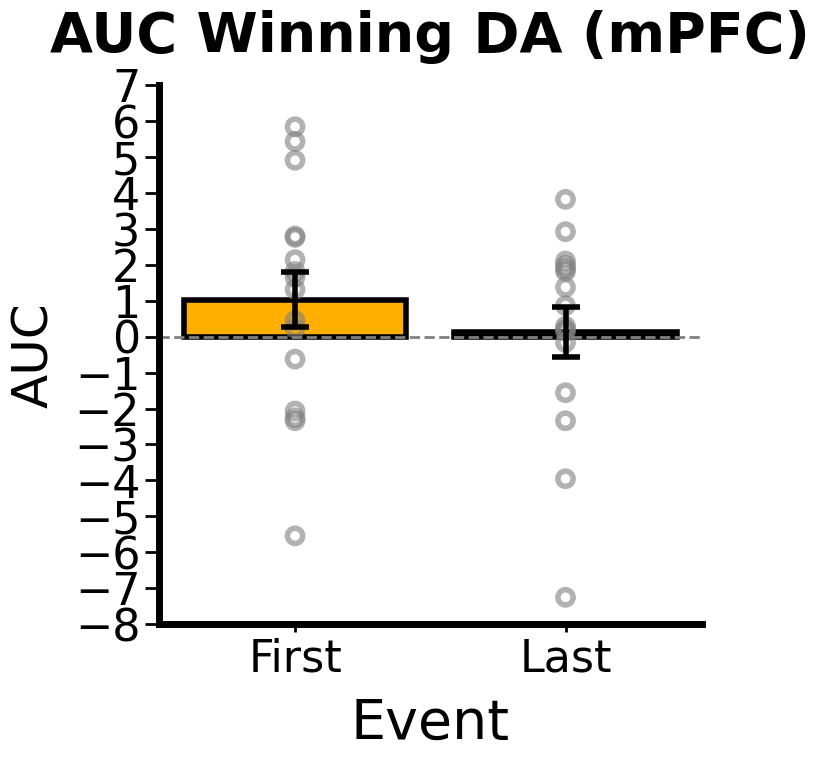

    Tone AUC First
10        3.520280
11        3.579152
12       -3.829442
13        1.653235
14        3.340129
15        1.308387
16       -3.822243
17       -5.442073
18       -3.197522
19        0.224998
20       -1.539952
21        2.732182
22        0.346721
23        7.277964
24        1.297142
25        0.499418
    Tone AUC Last
10       1.639216
11      -0.973348
12      -3.111607
13      -3.313818
14       0.256313
15       0.178817
16       0.664158
17       2.177176
18      -0.793534
19      -3.806016
20       0.295463
21      -0.266542
22       1.810440
23      -1.504417
24       0.150357
25      -0.049950
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 10    3.520280
11    3.579152
12   -3.829442
13    1.653235
14    3.340129
15    1.308387
16   -3.822243
17   -5.442073
18   -3.197522
19    0.224998
20   -1.539952
21    2.732182
22    0.346721
23    7.277964
24    1.297142
25    0.499418
Name: Tone AUC First, dtype: float64
df1: 10    1.6

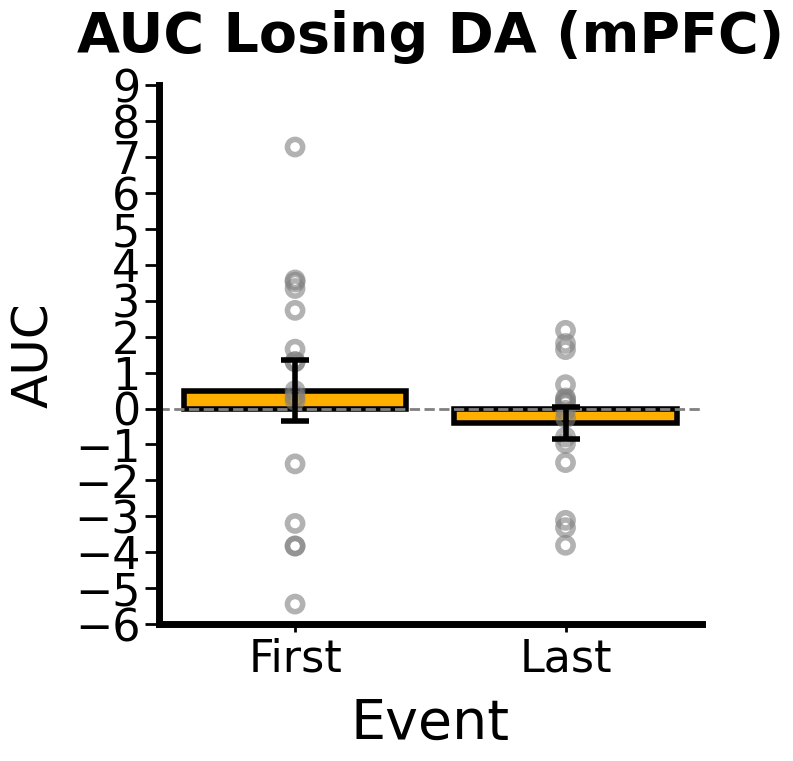

   Tone AUC First
0        0.000286
1        8.329927
2       13.466195
3        8.662046
4       10.442459
5        2.231515
6       15.037644
7       13.629326
8        8.969484
9       14.146898
   Tone AUC Last
0       0.932880
1       6.109724
2       6.433502
3       2.510915
4       9.436087
5       5.282823
6       6.414023
7       5.864330
8       6.283309
9       3.636925
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 0     0.000286
1     8.329927
2    13.466195
3     8.662046
4    10.442459
5     2.231515
6    15.037644
7    13.629326
8     8.969484
9    14.146898
Name: Tone AUC First, dtype: float64
df1: 0    0.932880
1    6.109724
2    6.433502
3    2.510915
4    9.436087
5    5.282823
6    6.414023
7    5.864330
8    6.283309
9    3.636925
Name: Tone AUC Last, dtype: float64
T-test for Tone AUC First and Tone AUC Last: t=2.371, p=3.415e-02


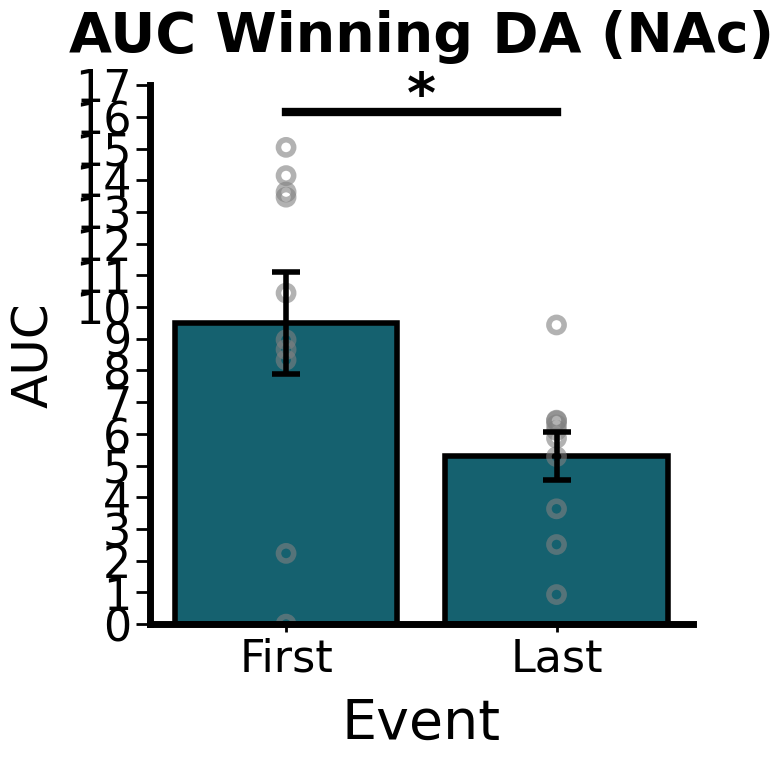

   Tone AUC First
0        1.709123
1       -0.179178
2       -1.469365
3       -1.749001
4        3.671975
5       -1.751639
6        5.024925
7       -1.069247
8        7.320025
9        0.215780
   Tone AUC Last
0       1.343590
1      -0.914010
2       4.002715
3      -3.356895
4      -3.627365
5      -1.015407
6      -0.319847
7      -0.722160
8      -2.370785
9       2.518921
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 0    1.709123
1   -0.179178
2   -1.469365
3   -1.749001
4    3.671975
5   -1.751639
6    5.024925
7   -1.069247
8    7.320025
9    0.215780
Name: Tone AUC First, dtype: float64
df1: 0    1.343590
1   -0.914010
2    4.002715
3   -3.356895
4   -3.627365
5   -1.015407
6   -0.319847
7   -0.722160
8   -2.370785
9    2.518921
Name: Tone AUC Last, dtype: float64
T-test for Tone AUC First and Tone AUC Last: t=1.272, p=2.206e-01


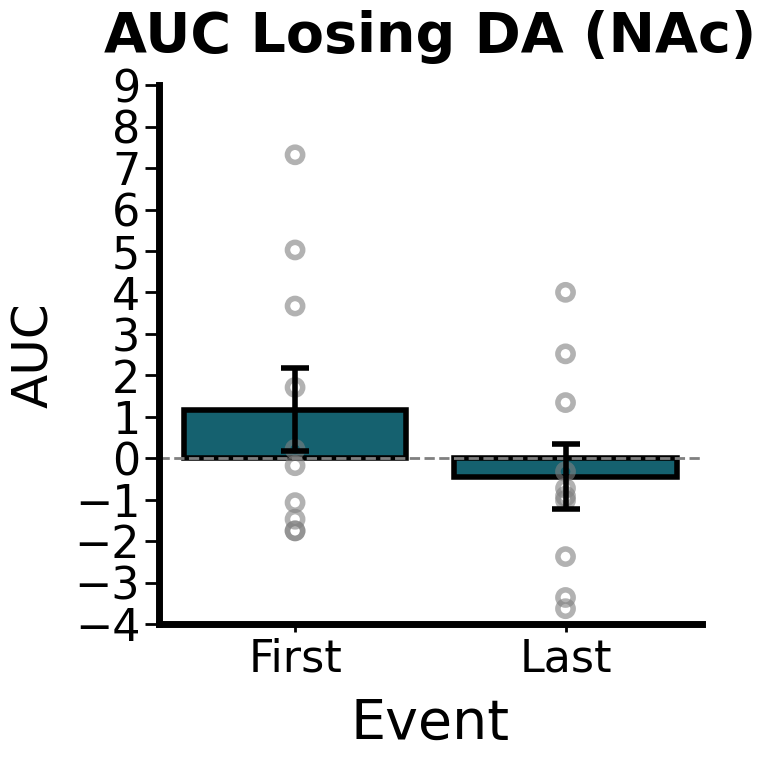

In [12]:
df_win = df_winning1
df_lose = df_losing1
exp.plot_da_first_last(df_win, metric_name='AUC', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='AUC', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='AUC', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='AUC', directory_path=directory_path, condition="Losing", brain_region="NAc")

    Tone Max Peak First
10             2.059989
11             2.831879
12             1.589391
13             0.994242
14             1.586181
15             1.011766
16             1.202588
17             1.899602
18             3.241119
19             1.685638
20             2.303223
21             2.196014
22             2.543001
23             2.388813
24             1.633006
25             2.283795
    Tone Max Peak Last
10            1.343714
11            2.070113
12            1.076721
13            0.368939
14            1.534366
15            0.241127
16            0.907355
17            1.368829
18            2.004935
19            2.379393
20            2.661004
21            2.142447
22            1.605119
23            1.870543
24            1.794742
25            2.056471
Index(['Tone Max Peak First'], dtype='object')
Processing column: Tone Max Peak First
df: 10    2.059989
11    2.831879
12    1.589391
13    0.994242
14    1.586181
15    1.011766
16    1.202588
17    

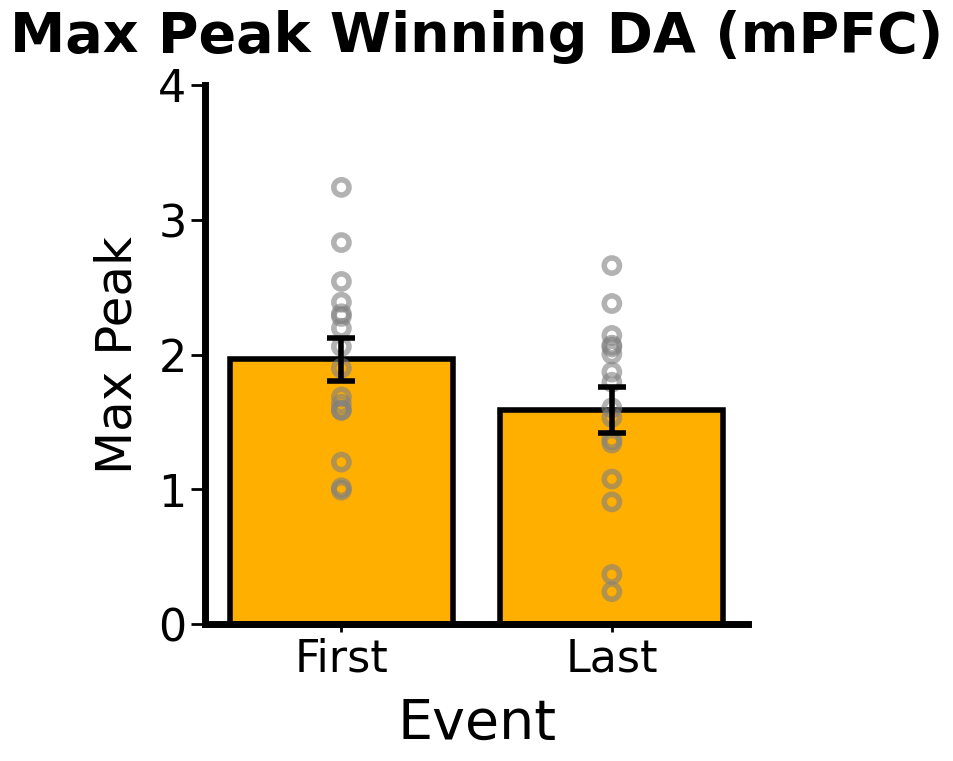

    Tone Max Peak First
10             2.107183
11             3.016503
12             0.793054
13             1.949180
14             2.336547
15             1.422092
16             1.332015
17             0.338386
18             1.756852
19             1.894366
20             2.023091
21             2.167510
22             1.971715
23             2.910710
24             1.826014
25             2.126088
    Tone Max Peak Last
10            1.647936
11            2.176367
12            1.249626
13            0.750670
14            1.186582
15            1.039698
16            1.311623
17            1.565132
18            2.189291
19            1.704478
20            2.319760
21            2.495378
22            2.141936
23            1.306912
24            1.919822
25            1.739933
Index(['Tone Max Peak First'], dtype='object')
Processing column: Tone Max Peak First
df: 10    2.107183
11    3.016503
12    0.793054
13    1.949180
14    2.336547
15    1.422092
16    1.332015
17    

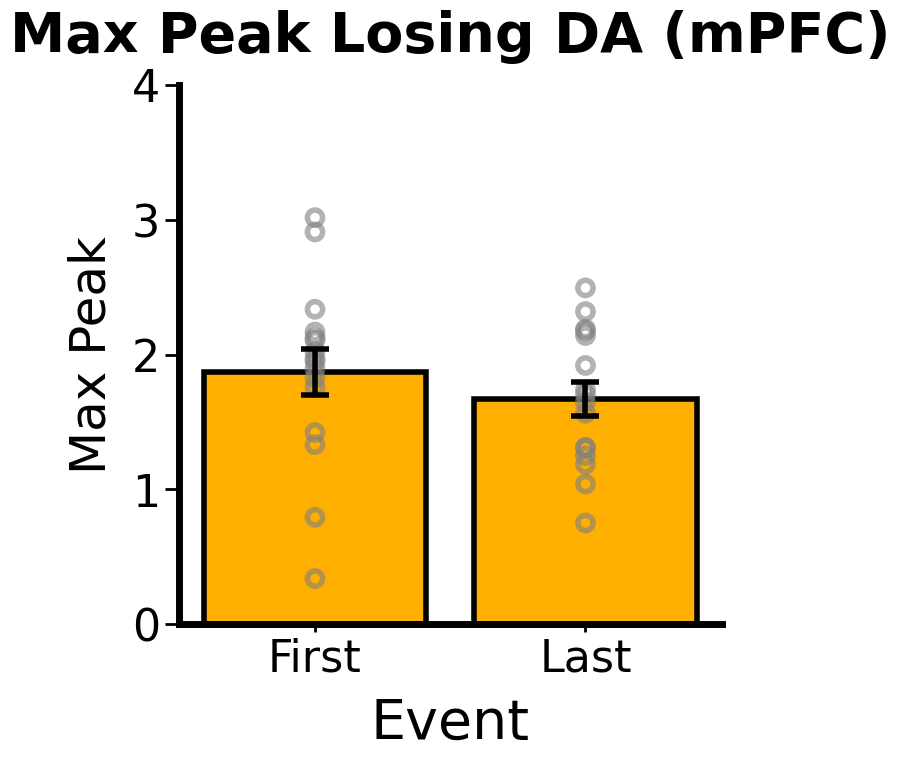

   Tone Max Peak First
0             2.881470
1             9.330029
2             7.174458
3             6.990774
4             5.624572
5             2.484583
6             7.538725
7             7.364636
8             7.085037
9             6.380969
   Tone Max Peak Last
0            1.993282
1            7.005548
2            4.475586
3            3.728406
4            6.641084
5            3.233571
6            4.809507
7            3.890687
8            5.277687
9            4.505044
Index(['Tone Max Peak First'], dtype='object')
Processing column: Tone Max Peak First
df: 0    2.881470
1    9.330029
2    7.174458
3    6.990774
4    5.624572
5    2.484583
6    7.538725
7    7.364636
8    7.085037
9    6.380969
Name: Tone Max Peak First, dtype: float64
df1: 0    1.993282
1    7.005548
2    4.475586
3    3.728406
4    6.641084
5    3.233571
6    4.809507
7    3.890687
8    5.277687
9    4.505044
Name: Tone Max Peak Last, dtype: float64
T-test for Tone Max Peak First and Tone Max Pea

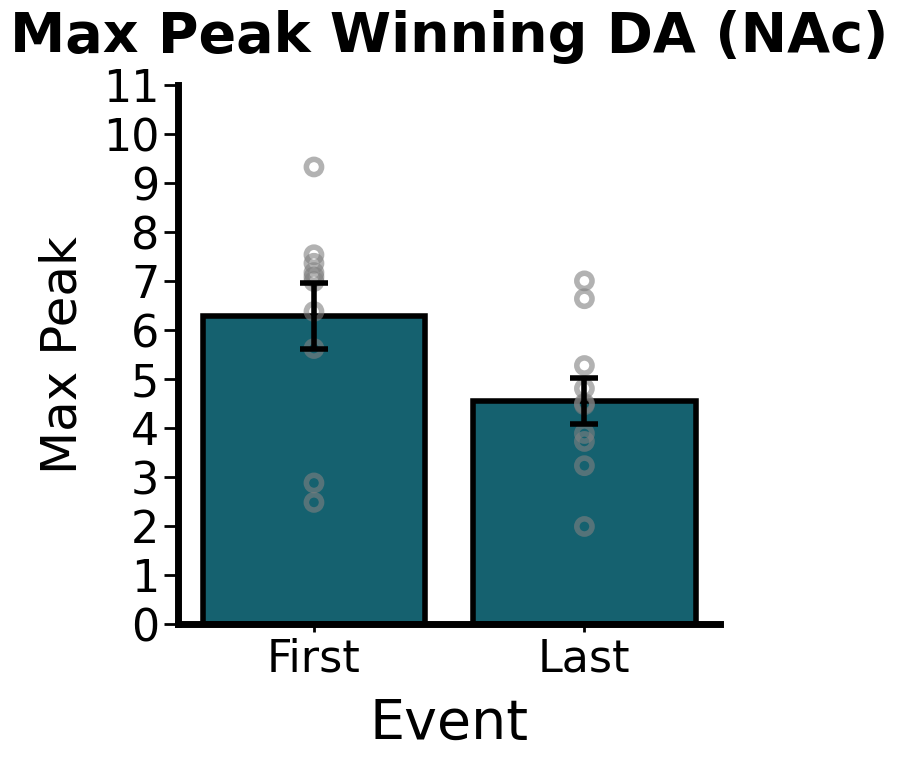

   Tone Max Peak First
0             1.433923
1             4.191019
2             0.814347
3             2.227567
4             3.716306
5             1.033713
6             4.907377
7             1.189867
8             4.978202
9             2.429277
   Tone Max Peak Last
0            1.762959
1            2.352675
2            3.240117
3            1.249793
4            2.643598
5            1.056600
6            2.223698
7            1.986791
8            2.961299
9            3.123181
Index(['Tone Max Peak First'], dtype='object')
Processing column: Tone Max Peak First
df: 0    1.433923
1    4.191019
2    0.814347
3    2.227567
4    3.716306
5    1.033713
6    4.907377
7    1.189867
8    4.978202
9    2.429277
Name: Tone Max Peak First, dtype: float64
df1: 0    1.762959
1    2.352675
2    3.240117
3    1.249793
4    2.643598
5    1.056600
6    2.223698
7    1.986791
8    2.961299
9    3.123181
Name: Tone Max Peak Last, dtype: float64
T-test for Tone Max Peak First and Tone Max Pea

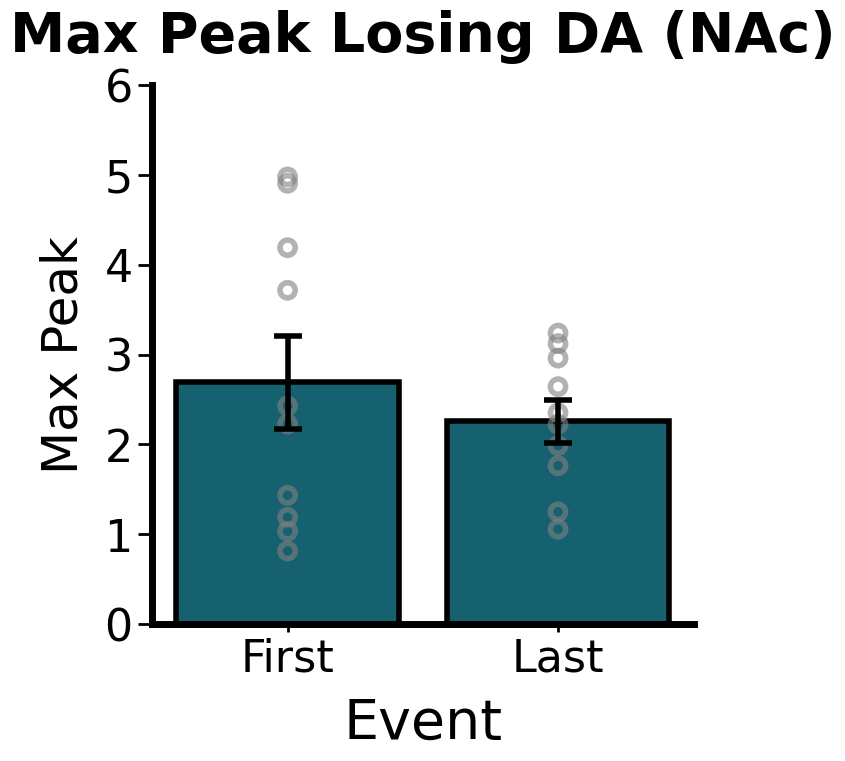

In [13]:
exp.plot_da_first_last(df_win, metric_name='Max Peak', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Max Peak', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', directory_path=directory_path, condition="Losing", brain_region="NAc")

    Tone Mean Z-score First
10                 0.357405
11                 0.460535
12                 0.302621
13                -0.390038
14                -0.376019
15                -0.345152
16                -0.923821
17                 0.818185
18                 0.905610
19                 0.075027
20                 0.275751
21                 0.038340
22                 0.466950
23                 0.973837
24                -0.104039
25                 0.219027
    Tone Mean Z-score Last
10               -0.026726
11                0.048871
12               -0.390160
13               -1.209230
14                0.637079
15               -0.658968
16               -0.259991
17                0.315244
18                0.034843
19                0.302866
20                0.144185
21                0.229342
22                0.350981
23                0.487226
24                0.024360
25                0.330626
Index(['Tone Mean Z-score First'], dtype='object')
Processing col

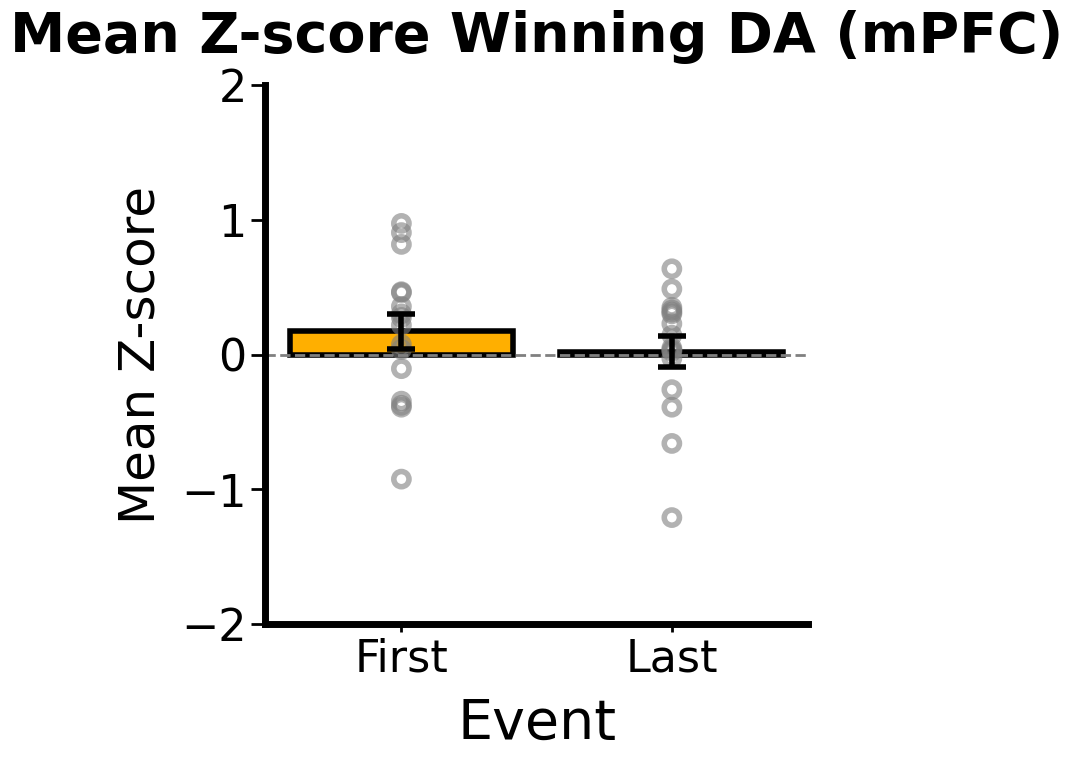

    Tone Mean Z-score First
10                 0.586831
11                 0.596702
12                -0.638302
13                 0.275593
14                 0.556784
15                 0.218049
16                -0.637024
17                -0.907172
18                -0.533093
19                 0.037517
20                -0.256868
21                 0.455459
22                 0.057793
23                 1.213146
24                 0.216210
25                 0.083178
    Tone Mean Z-score Last
10                0.273134
11               -0.162191
12               -0.518763
13               -0.552393
14                0.042736
15                0.029816
16                0.110686
17                0.362871
18               -0.132340
19               -0.634482
20                0.049150
21               -0.044530
22                0.301730
23               -0.250740
24                0.025091
25               -0.008404
Index(['Tone Mean Z-score First'], dtype='object')
Processing col

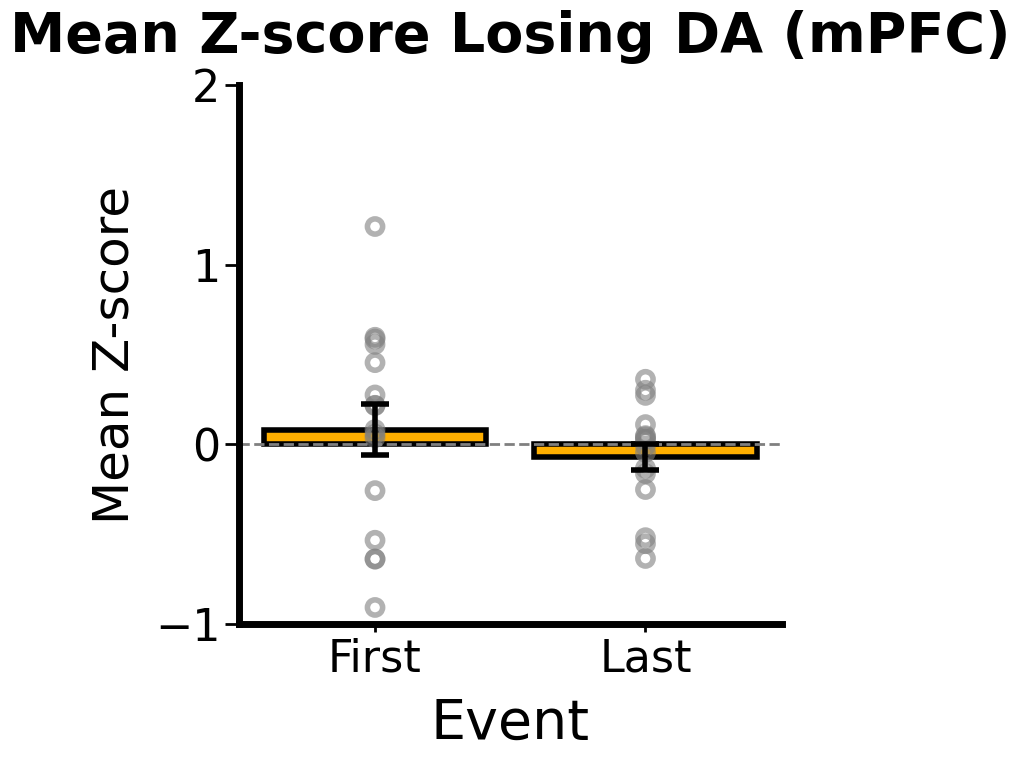

   Tone Mean Z-score First
0                 0.000171
1                 1.388535
2                 2.244562
3                 1.443859
4                 1.740447
5                 0.371953
6                 2.506763
7                 2.272143
8                 1.494885
9                 2.357965
   Tone Mean Z-score Last
0                0.155484
1                1.018364
2                1.072609
3                0.418484
4                1.572757
5                0.880725
6                1.068948
7                0.977538
8                1.047368
9                0.606131
Index(['Tone Mean Z-score First'], dtype='object')
Processing column: Tone Mean Z-score First
df: 0    0.000171
1    1.388535
2    2.244562
3    1.443859
4    1.740447
5    0.371953
6    2.506763
7    2.272143
8    1.494885
9    2.357965
Name: Tone Mean Z-score First, dtype: float64
df1: 0    0.155484
1    1.018364
2    1.072609
3    0.418484
4    1.572757
5    0.880725
6    1.068948
7    0.977538
8    1.047368
9 

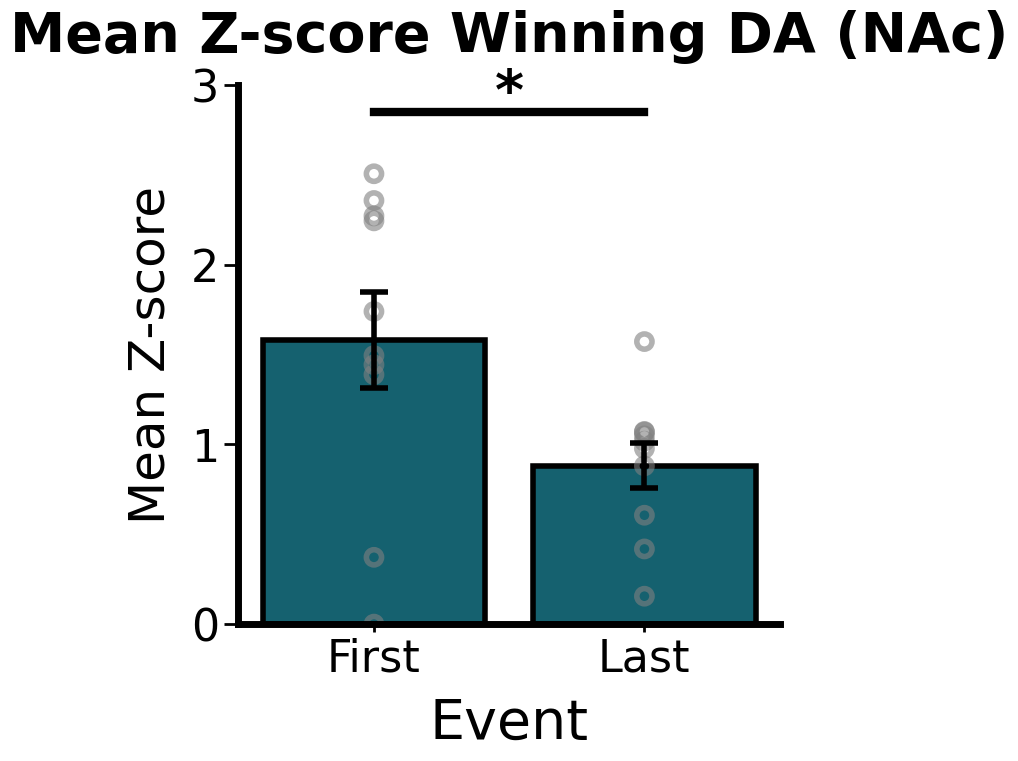

   Tone Mean Z-score First
0                 0.284879
1                -0.029737
2                -0.244923
3                -0.291641
4                 0.612066
5                -0.292019
6                 0.837536
7                -0.178338
8                 1.220250
9                 0.035904
   Tone Mean Z-score Last
0                0.223996
1               -0.152436
2                0.667298
3               -0.559530
4               -0.604537
5               -0.169276
6               -0.053368
7               -0.120365
8               -0.395150
9                0.419724
Index(['Tone Mean Z-score First'], dtype='object')
Processing column: Tone Mean Z-score First
df: 0    0.284879
1   -0.029737
2   -0.244923
3   -0.291641
4    0.612066
5   -0.292019
6    0.837536
7   -0.178338
8    1.220250
9    0.035904
Name: Tone Mean Z-score First, dtype: float64
df1: 0    0.223996
1   -0.152436
2    0.667298
3   -0.559530
4   -0.604537
5   -0.169276
6   -0.053368
7   -0.120365
8   -0.395150
9 

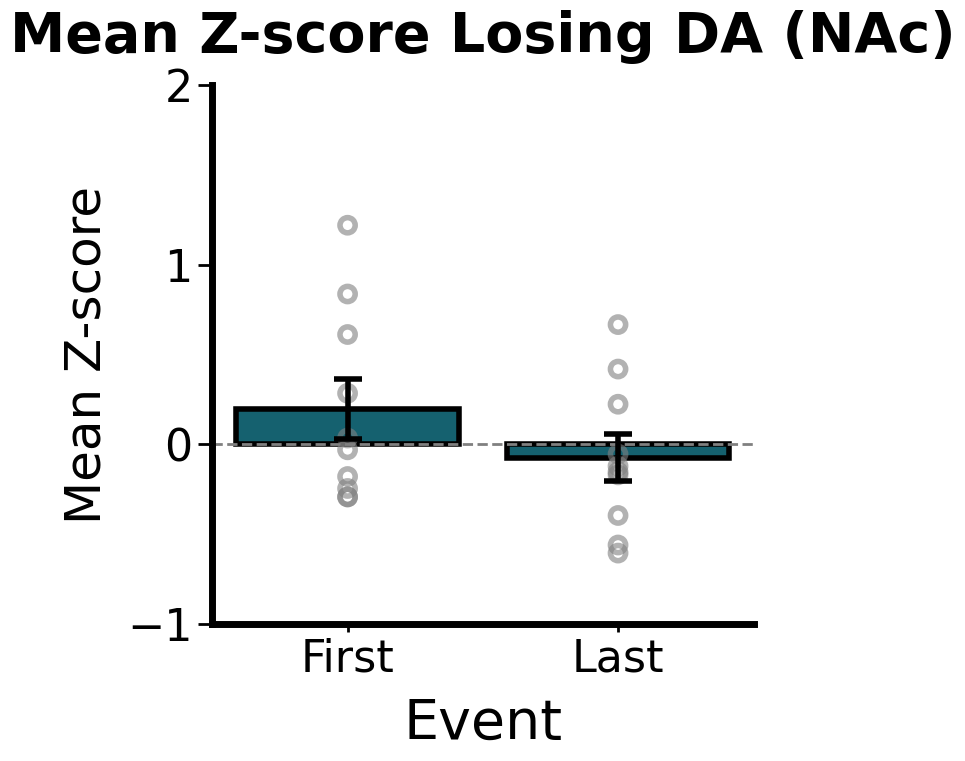

In [14]:
exp.plot_da_first_last(df_win, metric_name='Mean Z-score', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Mean Z-score', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', directory_path=directory_path, condition="Losing", brain_region="NAc")

In [15]:
exp.scatter_dominance(directory_path1, df_win, metric_name='AUC', method='', condition="Winning")
exp.scatter_dominance(directory_path1, df_lose, metric_name='AUC', method='', condition="Losing")

KeyError: 'Tone AUC Mean'

In [ ]:
exp.scatter_dominance(directory_path1, df_win, 'Max Peak', method='', condition="Winning")
exp.scatter_dominance(directory_path1, df_lose, 'Max Peak', method='', condition="Losing")

In [ ]:
exp.scatter_dominance(directory_path1, df_win, 'Mean Z-score', condition='Winning')
exp.scatter_dominance(directory_path1, df_lose, 'Mean Z-score', condition='Losing')

## Scatter plots for Event Induced

In [ ]:
exp.scatter_dominance(directory_path1, df_win, metric_name='AUC', method=' EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_lose, metric_name='AUC', method=' EI', condition="Losing")

In [ ]:
exp.scatter_dominance(directory_path1, df_win, metric_name='Max Peak', method=' EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_lose, metric_name='Max Peak', method=' EI', condition="Losing")